In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle
import sys

sys.path.insert(0, "C:/workspace/data-science//libs")
from big_numbers import expand_to_18_decimals, expand_to_18_decimals_object, contract_18_decimals_to_float

In [2]:
def hued_lineplot(df: pd.DataFrame, column_1: str, column_2: str, hued_column: str,
                  labels: list, xlabel: str, ylabel: str, title: str, 
                  color_set: str='Set1', xsize: int=30, ysize: int=15,
                  is_grid_required: bool=False):
    """Hued lineplot

    Args:
        df (pd.DataFrame): data to plot
        column_1 (str): x axis column
        column_2 (str): y axis column
        hued_column (str): column based on which hue will be performed
        labels (list): categories based on which hue will be done
        xlabel (str): x axis name
        ylabel (str): y axis name
        title (str): name of the chart
        color_set (str, optional): color set chosen for plotting lines. Defaults to 'Set1'.
        xsize (int, optional): x size of chart. Defaults to 30.
        ysize (int, optional): y size of chart. Defaults to 15.
        is_grid_required (bool, optional): is grid of the chart required. Defaults to False
    """
    fig, ax = plt.subplots(figsize=(xsize, ysize))
    rgb_values = sns.color_palette(color_set, len(labels))
    color_map = dict(zip(labels, rgb_values))
    
    for label in labels:
        ax.plot(df[df[hued_column] == label][column_1], df[df[hued_column] == label][column_2],
                color=color_map[label], label=label)
    
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    
    fig.legend()
    ax.grid(is_grid_required)
    plt.show()

In [3]:
%%time
position_changes_df = pd.read_csv('position_changes_pure_df.csv')
positions_df = pd.read_csv('positions_pure_df.csv')
amm_positions_df = pd.read_csv('amm_positions_pure_df.csv')
liquidations_df = pd.read_csv('liquidation_pure_df.csv')

position_changes_df.drop(columns=['Unnamed: 0'], inplace=True)
positions_df.drop(columns=['Unnamed: 0'], inplace=True)
amm_positions_df.drop(columns=['Unnamed: 0'], inplace=True)

<timed exec>:1: DtypeWarning: Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.


Wall time: 55 s


In [4]:
position_changes_df.fillna(0, inplace=True)

In [5]:
liquidations_df

,Unnamed: 0,id,trader,amm,position_notional,position_size,liquidation_fee,liquidator,badDebt,block_number,timestamp
0,0,0xc4889e27cec24728d805bc53ea69ec9771c85bfce825...,0x2823819fe9e6c8ad24daa61777089dcbffdc59bc,0x0f346e19f01471c02485df1758cfd3d624e399b4,2019651781101278550100,100000000000000000,25245647263765981876,0x5a0f7edceda1b0267a15544b883c9e749405585a,0,13549293,2020-12-16 13:50:40
1,1,0xad73d00c92a596d4f2ff993a0739ceadf2aebb6f4449...,0xfc4656e9b916b2cbc4aa0e870ba4d9a46c8b59a9,0x0f346e19f01471c02485df1758cfd3d624e399b4,5091745730336835779492,250000000000000000,63646821629210447243,0x5a0f7edceda1b0267a15544b883c9e749405585a,0,13549484,2020-12-16 14:06:45
2,2,0x6ed6cba6b46fb7fc560dc5c8ee9a1a8d3ec5cdb5ebdf...,0xbeb0d8f05c5f923b80690657da949cebd9a2bfbc,0x8d22f1a9dce724d8c1b4c688d75f17a2fe2d32df,5698613657512103778707,8822341982986002606,71232670718901297233,0x5a0f7edceda1b0267a15544b883c9e749405585a,0,13556301,2020-12-17 00:17:35
3,3,0x334432dee6a350dd6b13805babe635160fd4c9f078c6...,0x3f84e391ea8dc12946e17d1d85cdf0b35d4fe650,0x8d22f1a9dce724d8c1b4c688d75f17a2fe2d32df,648204518143780021975,1000000000000000000,8102556476797250274,0x5a0f7edceda1b0267a15544b883c9e749405585a,0,13556346,2020-12-17 00:21:45
4,4,0xa1b2fc6d459f6d32fe405388fe8f766925cd76e58e0d...,0x3871dffe795145bcce5e24793a82d93993550843,0x8d22f1a9dce724d8c1b4c688d75f17a2fe2d32df,10363661814828051856,15467118125853643,129545772685350648,0x5a0f7edceda1b0267a15544b883c9e749405585a,0,13563166,2020-12-17 10:36:45
...,...,...,...,...,...,...,...,...,...,...,...
38718,38718,0x56e5675cbd5f03a9ecacfb0c326803f5cb286e98f1c2...,0xa477d602fc2f47d02da9d60c6641b689ea00ed5f,0xab08ff2c726f2f333802630ee19f4146385cc343,3201096799751271873,1700370486983496789,20006854998445449,0x5a0f7edceda1b0267a15544b883c9e749405585a,0,21119227,2022-03-15 08:57:10
38719,38719,0x5bb9a4f0a8ccd1ebe539c4b7ff20673ef416bc7d02f3...,0xd83764c857e7f0ed34630d99525a08cadea0bb03,0xab08ff2c726f2f333802630ee19f4146385cc343,76980056439480366,40890572968154322,481125352746752,0x5a0f7edceda1b0267a15544b883c9e749405585a,0,21119227,2022-03-15 08:57:10
38720,38720,0x9c05125f70f7a8d3dd1fc8ef935e3eb64a1de80a8019...,0xa142beec647e09d34b495b1b5e9c96224fbe8177,0xab08ff2c726f2f333802630ee19f4146385cc343,572889991709714046,304310174982842762,3580562448185712,0x5a0f7edceda1b0267a15544b883c9e749405585a,0,21119234,2022-03-15 08:57:45
38721,38721,0xec3a56a6f3f80f2bd00a62cd16e9b44c2502fed4b038...,0x0697710efbf1a8c4410420ce8c4ad410cadf457a,0xab08ff2c726f2f333802630ee19f4146385cc343,1671894377334319910,888083753677943760,10449339858339499,0x5a0f7edceda1b0267a15544b883c9e749405585a,0,21119234,2022-03-15 08:57:45


In [6]:
position_changes_df.columns

Index(['id', 'trader', 'amm', 'margin', 'position_notional',
       'exchanged_position_size', 'fee', 'position_size_after', 'realized_pnl',
       'unrealized_pnl_after', 'bad_debt', 'liquidation_penalty', 'spot_price',
       'funding_payment', 'block_number', 'timestamp'],
      dtype='object')

# Check connection by trader

In [7]:
print(liquidations_df[liquidations_df['trader'] == position_changes_df.iloc[0]['trader']].shape)
liquidations_df[liquidations_df['trader'] == position_changes_df.iloc[0]['trader']]

(19, 11)


,Unnamed: 0,id,trader,amm,position_notional,position_size,liquidation_fee,liquidator,badDebt,block_number,timestamp
12932,12932,0x5356d0e978df6871629b16d5e3bd7290fe17fc8bf04d...,0x1a48776f436bcdaa16845a378666cf4ba131eb0f,0x6de775aabeeede8efdb1a257198d56a3ac18c2fd,2550839936242069415662,93053939501647811906,15942749601512933847,0x6b79204bc16aa7a7a157c7918d1151b648863d91,0,17973288,2021-09-07 15:19:05
12933,12933,0x9fe2f101efee95fe34fc840b5d536ac73f47c49da496...,0x1a48776f436bcdaa16845a378666cf4ba131eb0f,0x6de775aabeeede8efdb1a257198d56a3ac18c2fd,3404198539041986624118,124071919335530415875,21276240869012416400,0x6b79204bc16aa7a7a157c7918d1151b648863d91,0,17973288,2021-09-07 15:19:05
24317,24317,0x6a97f88bc3a8cb375a823a4c09dc71cf913c76ac0780...,0x1a48776f436bcdaa16845a378666cf4ba131eb0f,0xab08ff2c726f2f333802630ee19f4146385cc343,52023104255,13178872927,325144401,0xa877b3e87433c5bf7a31dc6f605d39c5758203e2,0,19108842,2021-11-17 01:15:05
24363,24363,0x4970bb9e5b304f852238508d1c4bd7f5b706ec02555c...,0x1a48776f436bcdaa16845a378666cf4ba131eb0f,0xab08ff2c726f2f333802630ee19f4146385cc343,39257770778,9884154696,245361067,0x5a0f7edceda1b0267a15544b883c9e749405585a,0,19120844,2021-11-17 18:51:10
24365,24365,0xa97fcafb0adf062ba3914192ac1500b8f2a1938b5487...,0x1a48776f436bcdaa16845a378666cf4ba131eb0f,0xab08ff2c726f2f333802630ee19f4146385cc343,29818316352,7413116022,186364477,0x5a0f7edceda1b0267a15544b883c9e749405585a,0,19124249,2021-11-17 23:50:55
24367,24367,0xdf8b49a141dad0b0969feedda59e8233133e6ce0e381...,0x1a48776f436bcdaa16845a378666cf4ba131eb0f,0xab08ff2c726f2f333802630ee19f4146385cc343,22692663722,5559837016,141829148,0x5a0f7edceda1b0267a15544b883c9e749405585a,0,19124873,2021-11-18 00:45:45
24369,24369,0xa53061a6dcaddbb04091b5065312c01d3a21af8aae2b...,0x1a48776f436bcdaa16845a378666cf4ba131eb0f,0xab08ff2c726f2f333802630ee19f4146385cc343,17434714591,4169877762,108966966,0x5a0f7edceda1b0267a15544b883c9e749405585a,0,19125016,2021-11-18 00:58:20
24372,24372,0xb3f37bde9bb56d0c2fdc88a9407ada8c746aa6c5a662...,0x1a48776f436bcdaa16845a378666cf4ba131eb0f,0xab08ff2c726f2f333802630ee19f4146385cc343,13041961255,3127408322,81512257,0x5a0f7edceda1b0267a15544b883c9e749405585a,0,19125144,2021-11-18 01:09:35
24683,24683,0xf90defc4b42aef499cbfd345331bc5bb44abe654734e...,0x1a48776f436bcdaa16845a378666cf4ba131eb0f,0xab08ff2c726f2f333802630ee19f4146385cc343,9916844340,2345556241,61980277,0xa877b3e87433c5bf7a31dc6f605d39c5758203e2,0,19141654,2021-11-19 01:05:30
24947,24947,0x995e68fed0199620083605be71781f996bc7cff58705...,0x1a48776f436bcdaa16845a378666cf4ba131eb0f,0xab08ff2c726f2f333802630ee19f4146385cc343,7449393816,1759167181,46558711,0x5a0f7edceda1b0267a15544b883c9e749405585a,0,19198863,2021-11-22 08:51:45


# Check connection by vAMM

In [8]:
amm_positions_df[amm_positions_df['amm'] == position_changes_df.iloc[0]['amm']]

,id,amm,margin,open_notional,trading_volume,leverage,entry_price,realized_pnl,unrealized_pnl,funding_payment,fee,bad_debt,liquidation_penalty,total_pnl_amount,block_number,timestamp
0,0x7a0cb9bb153a9891d1852875af9bcb65e716038e,0x0f346e19f01471c02485df1758cfd3d624e399b4,0,0,973557806096639491963,0,0,3877193629795939317,0,32557905398584567,973557806096639490,0,0,2871077918300715260,13536482,2020-12-15 19:51:55
1,0x2823819fe9e6c8ad24daa61777089dcbffdc59bc,0x0f346e19f01471c02485df1758cfd3d624e399b4,0,0,3937220110690488022500,0,0,-102083451512069077700,0,-4032120232683888232,1917568329589209472,0,93705501679535757772,-193674401288510156712,13549293,2020-12-16 13:50:40
4,0xe620d45518c7147db9b6c42442c80cc68343e4e1,0x0f346e19f01471c02485df1758cfd3d624e399b4,0,0,5990847695616847422359,0,0,58838955816847422359,0,0,5990847695616847422,0,0,52848108121230574937,13549332,2020-12-16 13:54:00
6,0x9602686bf53a17baed60c48ba34ed4219a532381,0x0f346e19f01471c02485df1758cfd3d624e399b4,0,0,33226635926189772552590,0,0,17792407023400932044,0,-114614332899406570,33226635926189772547,0,0,-15319614569889433933,13527667,2020-12-15 07:19:35
8,0x991ab999dc48e2d5ce9bbfbc89b11797f98fd79d,0x0f346e19f01471c02485df1758cfd3d624e399b4,0,0,1294341405882821151052,0,0,-36321817503821151052,0,-812294060834667562,629015141349000018,0,38490999737013534589,-74629538321349018097,13567650,2020-12-17 17:31:45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18135,0xce7e86725fa9ef1f5cd0f266bf5d48af1686f445,0x0f346e19f01471c02485df1758cfd3d624e399b4,0,0,15550570910472554956755,0,0,3829089527445043245,0,3535844487531224,15550570910472554956,0,0,-11725017227515042935,13731449,2020-12-27 11:52:00
18149,0x020451bcc034381b86ee29e78aa9da0788913d80,0x0f346e19f01471c02485df1758cfd3d624e399b4,0,0,6044955202985726728025482,0,0,50644136114770334142224,0,-35524626821608732813405,6039134579758553930164,367369284457971504866,0,80496997641078484530331,20763036,2022-02-22 03:47:55
18181,0xe1be5195f6d7b951596944a030e7fc7abfc3d984,0x0f346e19f01471c02485df1758cfd3d624e399b4,2327210738293511919158,15845997874928787060295,54989728236175223941002,6809008575883539896,37681664929422598412219,797614773353565921449,574732625360862673260,-276711238070714373026,54989728236175223832,0,0,1019336283188105070643,21035324,2022-03-10 11:23:35
18199,0x88301e10b0ee2f7eb2c9dc9c8b98b813946d144e,0x0f346e19f01471c02485df1758cfd3d624e399b4,449645905880945208455707,848122775461465901043978,2592174309371600541084051,1886201485143794961,45586331277214452217189,-41415941462398990482861,-172942917357128643716878,-62888932960766595132193,2592174309371600540835,0,0,18880817188996004108497,21117991,2022-03-15 07:13:55


In [9]:
liquidations_df.drop(columns=["Unnamed: 0"], inplace=True)
liquidations_df[liquidations_df['amm'] == position_changes_df.iloc[0]['amm']]

,id,trader,amm,position_notional,position_size,liquidation_fee,liquidator,badDebt,block_number,timestamp
0,0xc4889e27cec24728d805bc53ea69ec9771c85bfce825...,0x2823819fe9e6c8ad24daa61777089dcbffdc59bc,0x0f346e19f01471c02485df1758cfd3d624e399b4,2019651781101278550100,100000000000000000,25245647263765981876,0x5a0f7edceda1b0267a15544b883c9e749405585a,0,13549293,2020-12-16 13:50:40
1,0xad73d00c92a596d4f2ff993a0739ceadf2aebb6f4449...,0xfc4656e9b916b2cbc4aa0e870ba4d9a46c8b59a9,0x0f346e19f01471c02485df1758cfd3d624e399b4,5091745730336835779492,250000000000000000,63646821629210447243,0x5a0f7edceda1b0267a15544b883c9e749405585a,0,13549484,2020-12-16 14:06:45
5,0xb24b3ed03cf86e8ac99109652d760d1c1dad6938568a...,0x991ab999dc48e2d5ce9bbfbc89b11797f98fd79d,0x0f346e19f01471c02485df1758cfd3d624e399b4,665326264533821132973,28348177320385659,8316578306672764162,0x5a0f7edceda1b0267a15544b883c9e749405585a,0,13566849,2020-12-17 16:21:45
7,0x65285450118a94b63a5331a3ead10649ef45a846bdb4...,0x314d295677f81d037fd61bea21e81f9ea7aa2c64,0x0f346e19f01471c02485df1758cfd3d624e399b4,1054813607372086787849,43713150979573695,13185170092151084848,0x5a0f7edceda1b0267a15544b883c9e749405585a,0,13597384,2020-12-19 16:20:30
10,0xf0a6b83fbe536abdfffba006e7695254edfceaf1d532...,0xfdf3243db419d83327e5986f4a32cabac42dbf11,0x0f346e19f01471c02485df1758cfd3d624e399b4,318068271266392367526,13888064228196337,3975853390829904594,0x5a0f7edceda1b0267a15544b883c9e749405585a,0,13627477,2020-12-21 10:23:10
...,...,...,...,...,...,...,...,...,...,...
38538,0xeefa88aa4172fe152cf5eb75a2d4364c3b8afa3f3629...,0xe5b240ccab16f5a6e1f53cfa20ce2b3edf3d4555,0x0f346e19f01471c02485df1758cfd3d624e399b4,123273198161976923728,3259991714325131,770457488512355773,0x07cf2d1ba50f015571a6f1a5493b69781fdcd4ec,0,20978802,2022-03-07 02:59:45
38544,0x3e25e6dbfcd95771efc0c7e108ab72301416d6f2d519...,0xacaa3fefa87358c232495b851bce2ebe46a641ef,0x0f346e19f01471c02485df1758cfd3d624e399b4,26063930672391176454,698265942367729,162899566702444852,0x5a0f7edceda1b0267a15544b883c9e749405585a,0,20990761,2022-03-07 19:37:05
38552,0x407bbdd583a44bcfba91b3d02e36a0010997df00a6e6...,0x2c9af897a30602c864eb609d5e42a7f8c8b3f620,0x0f346e19f01471c02485df1758cfd3d624e399b4,559742410299249120,14958392458944,3498390064370307,0x5a0f7edceda1b0267a15544b883c9e749405585a,0,20990841,2022-03-07 19:43:45
38563,0x709ce91113f8eb0b483d0bcf59e95450f05d273e1f1f...,0x3c8af873ccf3379491750835130d1d81beecc9c3,0x0f346e19f01471c02485df1758cfd3d624e399b4,57474414749153195571,1538085299472777,359215092182207472,0x5a0f7edceda1b0267a15544b883c9e749405585a,0,20990900,2022-03-07 19:48:40


# Check connection by both trader and vAMM

In [10]:
liquidations_df[liquidations_df['trader'] == position_changes_df.iloc[0]['trader']]

,id,trader,amm,position_notional,position_size,liquidation_fee,liquidator,badDebt,block_number,timestamp
12932,0x5356d0e978df6871629b16d5e3bd7290fe17fc8bf04d...,0x1a48776f436bcdaa16845a378666cf4ba131eb0f,0x6de775aabeeede8efdb1a257198d56a3ac18c2fd,2550839936242069415662,93053939501647811906,15942749601512933847,0x6b79204bc16aa7a7a157c7918d1151b648863d91,0,17973288,2021-09-07 15:19:05
12933,0x9fe2f101efee95fe34fc840b5d536ac73f47c49da496...,0x1a48776f436bcdaa16845a378666cf4ba131eb0f,0x6de775aabeeede8efdb1a257198d56a3ac18c2fd,3404198539041986624118,124071919335530415875,21276240869012416400,0x6b79204bc16aa7a7a157c7918d1151b648863d91,0,17973288,2021-09-07 15:19:05
24317,0x6a97f88bc3a8cb375a823a4c09dc71cf913c76ac0780...,0x1a48776f436bcdaa16845a378666cf4ba131eb0f,0xab08ff2c726f2f333802630ee19f4146385cc343,52023104255,13178872927,325144401,0xa877b3e87433c5bf7a31dc6f605d39c5758203e2,0,19108842,2021-11-17 01:15:05
24363,0x4970bb9e5b304f852238508d1c4bd7f5b706ec02555c...,0x1a48776f436bcdaa16845a378666cf4ba131eb0f,0xab08ff2c726f2f333802630ee19f4146385cc343,39257770778,9884154696,245361067,0x5a0f7edceda1b0267a15544b883c9e749405585a,0,19120844,2021-11-17 18:51:10
24365,0xa97fcafb0adf062ba3914192ac1500b8f2a1938b5487...,0x1a48776f436bcdaa16845a378666cf4ba131eb0f,0xab08ff2c726f2f333802630ee19f4146385cc343,29818316352,7413116022,186364477,0x5a0f7edceda1b0267a15544b883c9e749405585a,0,19124249,2021-11-17 23:50:55
24367,0xdf8b49a141dad0b0969feedda59e8233133e6ce0e381...,0x1a48776f436bcdaa16845a378666cf4ba131eb0f,0xab08ff2c726f2f333802630ee19f4146385cc343,22692663722,5559837016,141829148,0x5a0f7edceda1b0267a15544b883c9e749405585a,0,19124873,2021-11-18 00:45:45
24369,0xa53061a6dcaddbb04091b5065312c01d3a21af8aae2b...,0x1a48776f436bcdaa16845a378666cf4ba131eb0f,0xab08ff2c726f2f333802630ee19f4146385cc343,17434714591,4169877762,108966966,0x5a0f7edceda1b0267a15544b883c9e749405585a,0,19125016,2021-11-18 00:58:20
24372,0xb3f37bde9bb56d0c2fdc88a9407ada8c746aa6c5a662...,0x1a48776f436bcdaa16845a378666cf4ba131eb0f,0xab08ff2c726f2f333802630ee19f4146385cc343,13041961255,3127408322,81512257,0x5a0f7edceda1b0267a15544b883c9e749405585a,0,19125144,2021-11-18 01:09:35
24683,0xf90defc4b42aef499cbfd345331bc5bb44abe654734e...,0x1a48776f436bcdaa16845a378666cf4ba131eb0f,0xab08ff2c726f2f333802630ee19f4146385cc343,9916844340,2345556241,61980277,0xa877b3e87433c5bf7a31dc6f605d39c5758203e2,0,19141654,2021-11-19 01:05:30
24947,0x995e68fed0199620083605be71781f996bc7cff58705...,0x1a48776f436bcdaa16845a378666cf4ba131eb0f,0xab08ff2c726f2f333802630ee19f4146385cc343,7449393816,1759167181,46558711,0x5a0f7edceda1b0267a15544b883c9e749405585a,0,19198863,2021-11-22 08:51:45


In [11]:
amm_positions_df.iloc[0]

id                     0x7a0cb9bb153a9891d1852875af9bcb65e716038e
amm                    0x0f346e19f01471c02485df1758cfd3d624e399b4
margin                                                          0
open_notional                                                   0
trading_volume                              973557806096639491963
leverage                                                        0
entry_price                                                     0
realized_pnl                                  3877193629795939317
unrealized_pnl                                                  0
funding_payment                                 32557905398584567
fee                                            973557806096639490
bad_debt                                                        0
liquidation_penalty                                             0
total_pnl_amount                              2871077918300715260
block_number                                             13536482
timestamp 

# Forming a total positions dataframe

In [12]:
positions_columns_mapper = {'margin': 'position_margin',
                            'open_notional': 'position_open_notional',
                            'trading_volume': 'position_trading_volume',
                            'leverage': 'position_leverage',
                            'realized_pnl': 'position_realized_pnl',
                            'unrealized_pnl': 'position_unrealized_pnl',
                            'funding_payment': 'position_funding_payment',
                            'fee': 'position_fee', 'bad_debt': 'position_bad_debt',
                            'liquidation_penalty': 'position_liquidation_penalty',
                            'total_pnl_amount': 'position_total_pnl_amount',
                            'block_number': 'position_block_number',
                            'timestamp': 'position_timestamp'}

amm_positions_columns_mapper = {'margin': 'amm_margin',
                                'open_notional': 'amm_open_notional',
                                'trading_volume': 'amm_trading_volume',
                                'leverage': 'amm_leverage',
                                'realized_pnl': 'amm_realized_pnl',
                                'unrealized_pnl': 'amm_unrealized_pnl',
                                'funding_payment': 'amm_funding_payment',
                                'fee': 'amm_fee', 'bad_debt': 'amm_bad_debt',
                                'liquidation_penalty': 'amm_liquidation_penalty',
                                'total_pnl_amount': 'amm_total_pnl_amount',
                                'block_number': 'amm_block_number', 'timestamp': 'amm_timestamp'}

positions_df.rename(columns=positions_columns_mapper, inplace=True)
amm_positions_df.rename(columns=amm_positions_columns_mapper, inplace=True)

In [13]:
total_positions_df = pd.merge(positions_df, amm_positions_df, on='id')

In [14]:
total_positions_df.to_csv('total_positions_pure_df.csv')

In [15]:
total_positions_df

,id,trader,position_margin,position_open_notional,position_trading_volume,position_leverage,position_realized_pnl,position_unrealized_pnl,position_funding_payment,position_fee,...,entry_price,amm_realized_pnl,amm_unrealized_pnl,amm_funding_payment,amm_fee,amm_bad_debt,amm_liquidation_penalty,amm_total_pnl_amount,amm_block_number,amm_timestamp
0,0x7a0cb9bb153a9891d1852875af9bcb65e716038e,0x7a0cb9bb153a9891d1852875af9bcb65e716038e,0,0,973557806096639491963,0,3877193629795939317,0,32557905398584567,973557806096639490,...,0,3877193629795939317,0,32557905398584567,973557806096639490,0,0,2871077918300715260,13536482,2020-12-15 19:51:55
1,0x2823819fe9e6c8ad24daa61777089dcbffdc59bc,0x2823819fe9e6c8ad24daa61777089dcbffdc59bc,0,0,3937220110690488022500,0,-102083451512069077700,0,-4032120232683888232,1917568329589209472,...,0,-102083451512069077700,0,-4032120232683888232,1917568329589209472,0,93705501679535757772,-193674401288510156712,13549293,2020-12-16 13:50:40
2,0xa163e3e565d67c71778060f9dc907cf92d13ce4a,0xa163e3e565d67c71778060f9dc907cf92d13ce4a,0,0,102774136437962910937,0,3649733037962910937,0,44781352758163660,102774136437962910,...,0,3649733037962910937,0,44781352758163660,102774136437962910,0,0,3502177548766784367,13551609,2020-12-16 17:15:15
3,0xfe32a37f15ee4a4b59715530e5817d1322b9df80,0xfe32a37f15ee4a4b59715530e5817d1322b9df80,0,0,12424222389186808956301,0,20951143501444494719,0,242877886406422400,12424222389186808955,...,0,20951143501444494719,0,242877886406422400,12424222389186808955,0,0,8284043225851263364,13552780,2020-12-16 18:59:50
4,0xe620d45518c7147db9b6c42442c80cc68343e4e1,0xe620d45518c7147db9b6c42442c80cc68343e4e1,0,0,18393392652043224887193,0,203452026043224887193,0,1076482803524146425,18393392652043224886,...,0,58838955816847422359,0,0,5990847695616847422,0,0,52848108121230574937,13549332,2020-12-16 13:54:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18248,0x000000ea89990a17ec07a35ac2bbb02214c50152,0x000000ea89990a17ec07a35ac2bbb02214c50152,1760202595065749526280167,2720141438170920873655775,4896960377977290895423601795,1545357020718012509,5745630205266154214078836,-423706360326890945873810,-1582756436297921982253256,4896535627335293145536120,...,3979847438049590205,106681083070561921172487,20509295159473014836056,-43022223745808566940874,96452905155871869168837,0,0,53250401660498618944524,21111594,2022-03-14 22:19:15
18249,0x000000ea89990a17ec07a35ac2bbb02214c50152,0x000000ea89990a17ec07a35ac2bbb02214c50152,1760202595065749526280167,2720141438170920873655775,4896960377977290895423601795,1545357020718012509,5745630205266154214078836,-423706360326890945873810,-1582756436297921982253256,4896535627335293145536120,...,7423079866138316707,39506834156430740766062,-295066528529766811441594,-92627630357163640782240,120097114116317669373940,0,0,12037350397276712174362,21035917,2022-03-10 12:16:05
18250,0xc5c1a28e9538958970ad3058923ecac0dcf96a3a,0xc5c1a28e9538958970ad3058923ecac0dcf96a3a,5068352815494657428836,13305405647085428504669,54272457574262784763251833,2625193259318680078,116634442366680349326094,367422413497257029351,336684383726236377850,54272457574262784762611,...,339284509826689350,116634442366680349326094,367422413497257029351,336684383726236377850,54272457574262784762611,0,0,62025300408691328185633,21123833,2022-03-15 15:22:55
18251,0xc0b5407a00233aef96cecc6adba8416d9e69e604,0xc0b5407a00233aef96cecc6adba8416d9e69e604,45747376490555483502378,50615064409877916500949,598992795305486422495898917,1106403651810008472,866156766249462080308870,625412624861698118938,-29801104980235498841044,598992795305486422485907,...,337616711462236607,866156766249462080308870,625412624861698118938,-29801104980235498841044,598992795305486422485907,0,0,296965075924211156664007,21123835,2022-03-15 15:23:05


In [16]:
liquidations_df

,id,trader,amm,position_notional,position_size,liquidation_fee,liquidator,badDebt,block_number,timestamp
0,0xc4889e27cec24728d805bc53ea69ec9771c85bfce825...,0x2823819fe9e6c8ad24daa61777089dcbffdc59bc,0x0f346e19f01471c02485df1758cfd3d624e399b4,2019651781101278550100,100000000000000000,25245647263765981876,0x5a0f7edceda1b0267a15544b883c9e749405585a,0,13549293,2020-12-16 13:50:40
1,0xad73d00c92a596d4f2ff993a0739ceadf2aebb6f4449...,0xfc4656e9b916b2cbc4aa0e870ba4d9a46c8b59a9,0x0f346e19f01471c02485df1758cfd3d624e399b4,5091745730336835779492,250000000000000000,63646821629210447243,0x5a0f7edceda1b0267a15544b883c9e749405585a,0,13549484,2020-12-16 14:06:45
2,0x6ed6cba6b46fb7fc560dc5c8ee9a1a8d3ec5cdb5ebdf...,0xbeb0d8f05c5f923b80690657da949cebd9a2bfbc,0x8d22f1a9dce724d8c1b4c688d75f17a2fe2d32df,5698613657512103778707,8822341982986002606,71232670718901297233,0x5a0f7edceda1b0267a15544b883c9e749405585a,0,13556301,2020-12-17 00:17:35
3,0x334432dee6a350dd6b13805babe635160fd4c9f078c6...,0x3f84e391ea8dc12946e17d1d85cdf0b35d4fe650,0x8d22f1a9dce724d8c1b4c688d75f17a2fe2d32df,648204518143780021975,1000000000000000000,8102556476797250274,0x5a0f7edceda1b0267a15544b883c9e749405585a,0,13556346,2020-12-17 00:21:45
4,0xa1b2fc6d459f6d32fe405388fe8f766925cd76e58e0d...,0x3871dffe795145bcce5e24793a82d93993550843,0x8d22f1a9dce724d8c1b4c688d75f17a2fe2d32df,10363661814828051856,15467118125853643,129545772685350648,0x5a0f7edceda1b0267a15544b883c9e749405585a,0,13563166,2020-12-17 10:36:45
...,...,...,...,...,...,...,...,...,...,...
38718,0x56e5675cbd5f03a9ecacfb0c326803f5cb286e98f1c2...,0xa477d602fc2f47d02da9d60c6641b689ea00ed5f,0xab08ff2c726f2f333802630ee19f4146385cc343,3201096799751271873,1700370486983496789,20006854998445449,0x5a0f7edceda1b0267a15544b883c9e749405585a,0,21119227,2022-03-15 08:57:10
38719,0x5bb9a4f0a8ccd1ebe539c4b7ff20673ef416bc7d02f3...,0xd83764c857e7f0ed34630d99525a08cadea0bb03,0xab08ff2c726f2f333802630ee19f4146385cc343,76980056439480366,40890572968154322,481125352746752,0x5a0f7edceda1b0267a15544b883c9e749405585a,0,21119227,2022-03-15 08:57:10
38720,0x9c05125f70f7a8d3dd1fc8ef935e3eb64a1de80a8019...,0xa142beec647e09d34b495b1b5e9c96224fbe8177,0xab08ff2c726f2f333802630ee19f4146385cc343,572889991709714046,304310174982842762,3580562448185712,0x5a0f7edceda1b0267a15544b883c9e749405585a,0,21119234,2022-03-15 08:57:45
38721,0xec3a56a6f3f80f2bd00a62cd16e9b44c2502fed4b038...,0x0697710efbf1a8c4410420ce8c4ad410cadf457a,0xab08ff2c726f2f333802630ee19f4146385cc343,1671894377334319910,888083753677943760,10449339858339499,0x5a0f7edceda1b0267a15544b883c9e749405585a,0,21119234,2022-03-15 08:57:45


In [17]:
liquidations_df[liquidations_df['trader'] == total_positions_df.iloc[16]['id']]

,id,trader,amm,position_notional,position_size,liquidation_fee,liquidator,badDebt,block_number,timestamp
14,0x93f523813f54406d886f436663cb96f946eabd8fbd16...,0x2d34ecb73ce439909f8b41ace311986f31001fbe,0x8d22f1a9dce724d8c1b4c688d75f17a2fe2d32df,5894369040136379253250,9762392067524265742,73679613001704740665,0x65351180a6608c40cbbf0b6383478df57e572d55,0,13662371,2020-12-23 10:56:45
15,0x48dc50bf75c18af6891ba5de31604a52b344a4fe52a9...,0x2d34ecb73ce439909f8b41ace311986f31001fbe,0x8d22f1a9dce724d8c1b4c688d75f17a2fe2d32df,694204925235147557,1202373671506304,8677561565439344,0x5a0f7edceda1b0267a15544b883c9e749405585a,0,13670679,2020-12-23 22:29:35


In [18]:
# transform all numerical data
position_changes_df['margin'] = position_changes_df['margin'].apply(lambda x: contract_18_decimals_to_float(x))
position_changes_df['position_notional'] = position_changes_df['position_notional'].apply(
                                            lambda x: contract_18_decimals_to_float(x))
position_changes_df['exchanged_position_size'] = position_changes_df['exchanged_position_size'].apply(
                                            lambda x: contract_18_decimals_to_float(x))
position_changes_df['fee'] = position_changes_df['fee'].apply(lambda x: contract_18_decimals_to_float(x))
position_changes_df['position_size_after'] = position_changes_df['position_size_after'].apply(
                                            lambda x: contract_18_decimals_to_float(x))
position_changes_df['realized_pnl'] = position_changes_df['realized_pnl'].apply(
                                            lambda x: contract_18_decimals_to_float(x))
position_changes_df['unrealized_pnl_after'] = position_changes_df['unrealized_pnl_after'].apply(
                                            lambda x: contract_18_decimals_to_float(x))
position_changes_df['bad_debt'] = position_changes_df['bad_debt'].apply(lambda x: contract_18_decimals_to_float(x))
position_changes_df['liquidation_penalty'] = position_changes_df['liquidation_penalty'].apply(
                                                lambda x: contract_18_decimals_to_float(x))
position_changes_df['spot_price'] = position_changes_df['spot_price'].apply(
                                    lambda x: contract_18_decimals_to_float(x))
position_changes_df['funding_payment'] = position_changes_df['funding_payment'].apply(
                                            lambda x: contract_18_decimals_to_float(x))

# make sure that there is a datetime info
position_changes_df['timestamp'] = pd.to_datetime(position_changes_df['timestamp'])

In [19]:
position_changes_df.trader.value_counts().head(500)

0x1a48776f436bcdaa16845a378666cf4ba131eb0f    866293
0x000000ea89990a17ec07a35ac2bbb02214c50152    441724
0xa7b6679232241b3a8cb819faeed876f3fe10d50b    384369
0x8fb5c6f3c336033deeedbb54ad95e96453c9eaa4    281192
0xce7e86725fa9ef1f5cd0f266bf5d48af1686f445    277686
                                               ...  
0x8b43adb7c0e01ac5cc4af110c507683b24c648e5       236
0xe9b6702c95127af2281eaeaed5690ae1850f9d2a       235
0xece94e10da05117e3dd3538f7ff4b2a4bff1a3f1       234
0x90b9e716a78fc6b5eed6c0c51b08641008d25bb6       234
0xe81e705ee7d71ede87fd329633571d43c637137b       233
Name: trader, Length: 500, dtype: int64

In [20]:
len(position_changes_df.trader.unique())

10177

In [21]:
total_positions_df.iloc[16]['trader']

'0x2d34ecb73ce439909f8b41ace311986f31001fbe'

In [22]:
positions_df[positions_df['trader'] == '0x2d34ecb73ce439909f8b41ace311986f31001fbe']

,id,trader,position_margin,position_open_notional,position_trading_volume,position_leverage,position_realized_pnl,position_unrealized_pnl,position_funding_payment,position_fee,position_bad_debt,position_liquidation_penalty,position_total_pnl_amount,position_block_number,position_timestamp
13,0x2d34ecb73ce439909f8b41ace311986f31001fbe,0x2d34ecb73ce439909f8b41ace311986f31001fbe,0,0,226346497384283763421639,0,-27330375969114789301,0,11719057101932365605,220451434139222149016,0,345308501369992218496,-604809368580261522418,13670679,2020-12-23 22:29:35


In [23]:
liquidations_df[liquidations_df['trader'] == '0x2d34ecb73ce439909f8b41ace311986f31001fbe']

,id,trader,amm,position_notional,position_size,liquidation_fee,liquidator,badDebt,block_number,timestamp
14,0x93f523813f54406d886f436663cb96f946eabd8fbd16...,0x2d34ecb73ce439909f8b41ace311986f31001fbe,0x8d22f1a9dce724d8c1b4c688d75f17a2fe2d32df,5894369040136379253250,9762392067524265742,73679613001704740665,0x65351180a6608c40cbbf0b6383478df57e572d55,0,13662371,2020-12-23 10:56:45
15,0x48dc50bf75c18af6891ba5de31604a52b344a4fe52a9...,0x2d34ecb73ce439909f8b41ace311986f31001fbe,0x8d22f1a9dce724d8c1b4c688d75f17a2fe2d32df,694204925235147557,1202373671506304,8677561565439344,0x5a0f7edceda1b0267a15544b883c9e749405585a,0,13670679,2020-12-23 22:29:35


In [24]:
position_changes_df[position_changes_df['trader'] == total_positions_df.iloc[18]['trader']]

,id,trader,amm,margin,position_notional,exchanged_position_size,fee,position_size_after,realized_pnl,unrealized_pnl_after,bad_debt,liquidation_penalty,spot_price,funding_payment,block_number,timestamp
30,0xe0be1fc41dc20dd4124799cc2479446aee8250a5174b...,0xe8913568dd98e1967c1063d04657a79a13964665,0x0f346e19f01471c02485df1758cfd3d624e399b4,100.000000,1000.000000,0.052432,1.000000,0.052432,0.000000,0.000000,0.0,0.0,19074.343109,0.000000,13511156,2020-12-14 07:16:30
46,0x8048097731963eadc1b442ddacffecc64ae7b1d76aed...,0xe8913568dd98e1967c1063d04657a79a13964665,0x8d22f1a9dce724d8c1b4c688d75f17a2fe2d32df,58.675679,586.756790,1.000000,0.586757,1.000000,0.000000,0.000000,0.0,0.0,586.786180,0.000000,13511896,2020-12-14 08:18:45
134,0x051119eece7a5464a02c447637f2b1c7ffc212b6ce9f...,0xe8913568dd98e1967c1063d04657a79a13964665,0x8d22f1a9dce724d8c1b4c688d75f17a2fe2d32df,58.288662,100.000000,-0.171037,0.100000,0.828963,-0.361083,-1.750062,0.0,0.0,584.664877,0.025933,13527530,2020-12-15 07:08:10
135,0xb672c2e6292ace991e82c1109ba62b6e11242a39afd9...,0xe8913568dd98e1967c1063d04657a79a13964665,0x0f346e19f01471c02485df1758cfd3d624e399b4,0.000000,1005.708415,-0.052432,1.005708,0.000000,5.708415,0.000000,0.0,0.0,19179.196834,1.002141,13527534,2020-12-15 07:08:30
136,0xf893d7c40fe0108150a3f7ad6afe312cfbad6a87407d...,0xe8913568dd98e1967c1063d04657a79a13964665,0x8d22f1a9dce724d8c1b4c688d75f17a2fe2d32df,0.000000,484.645646,-0.828963,0.484646,0.000000,-1.750062,0.000000,0.0,0.0,584.616417,0.000000,13527605,2020-12-15 07:14:25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4079,0x24fd3e7adeb7c279bba0c9dbceccc88388f136c2685e...,0xe8913568dd98e1967c1063d04657a79a13964665,0x8d22f1a9dce724d8c1b4c688d75f17a2fe2d32df,476.595701,3314.667510,5.752196,3.314668,8.212178,0.000000,7.142170,0.0,0.0,576.408393,0.000000,13672956,2020-12-24 01:39:45
4131,0x7ac5bc2c4bdd1f8a640b2c9fd04262a6d6ed08230e53...,0xe8913568dd98e1967c1063d04657a79a13964665,0x8d22f1a9dce724d8c1b4c688d75f17a2fe2d32df,494.962156,3671.773061,-6.296970,3.671773,1.915208,48.130996,14.638926,0.0,0.0,582.918308,0.069851,13673268,2020-12-24 02:05:45
4221,0xd7b79da7c7e1205029b771f7afa75711f566f9186b75...,0xe8913568dd98e1967c1063d04657a79a13964665,0x8d22f1a9dce724d8c1b4c688d75f17a2fe2d32df,456.382141,3520.870695,6.107049,3.520871,8.022257,0.000000,2.732324,0.0,0.0,576.700548,0.000000,13673820,2020-12-24 02:51:45
4759,0xf82d370085ad34331011341a336aa521d24474d1dfa8...,0xe8913568dd98e1967c1063d04657a79a13964665,0x8d22f1a9dce724d8c1b4c688d75f17a2fe2d32df,0.000000,4673.768496,-8.022257,4.673768,0.000000,51.233642,0.000000,0.0,0.0,582.366996,-0.666056,13677817,2020-12-24 08:25:30


In [25]:
position_changes_df[position_changes_df['trader'] == total_positions_df.iloc[16]['trader']]

,id,trader,amm,margin,position_notional,exchanged_position_size,fee,position_size_after,realized_pnl,unrealized_pnl_after,bad_debt,liquidation_penalty,spot_price,funding_payment,block_number,timestamp
1226,0x357a3afafd3166d5283c179a927af19df5ea0373d9a5...,0x2d34ecb73ce439909f8b41ace311986f31001fbe,0x8d22f1a9dce724d8c1b4c688d75f17a2fe2d32df,500.000000,3000.000000,4.650114,3.000000,4.650114,0.000000,0.0,0.0,0.000000,645.302994,0.000000,13574765,2020-12-18 07:26:00
1279,0x2143aca8433c6bd35ad3f48f46b5e8396851bb16e092...,0x2d34ecb73ce439909f8b41ace311986f31001fbe,0x8d22f1a9dce724d8c1b4c688d75f17a2fe2d32df,0.000000,3058.614412,-4.650114,3.058614,0.000000,58.614412,0.0,0.0,0.000000,657.588179,0.434065,13576991,2020-12-18 10:47:20
1281,0x1ce26445020ea832a55e75fdce4b5b958df15c885c0f...,0x2d34ecb73ce439909f8b41ace311986f31001fbe,0x8d22f1a9dce724d8c1b4c688d75f17a2fe2d32df,500.000000,5000.000000,-7.625251,5.000000,-7.625251,0.000000,0.0,0.0,0.000000,655.451416,0.000000,13577037,2020-12-18 10:51:30
1287,0x084696e5c6525cda80ec97216ffe6e31e57bd9c92e84...,0x2d34ecb73ce439909f8b41ace311986f31001fbe,0x8d22f1a9dce724d8c1b4c688d75f17a2fe2d32df,0.000000,4975.931344,7.625251,4.975931,0.000000,24.068656,0.0,0.0,0.000000,652.822542,-0.303616,13577205,2020-12-18 11:06:30
1391,0x3e82dd2b4f8f3a535c8db64ae2052393c2d384aff6b1...,0x2d34ecb73ce439909f8b41ace311986f31001fbe,0x8d22f1a9dce724d8c1b4c688d75f17a2fe2d32df,500.000000,5000.000000,7.749488,5.000000,7.749488,0.000000,0.0,0.0,0.000000,645.466562,0.000000,13581695,2020-12-18 17:43:00
1438,0x01990190778daa28db04bdb3be0a79ec7ee8f360d4ba...,0x2d34ecb73ce439909f8b41ace311986f31001fbe,0x8d22f1a9dce724d8c1b4c688d75f17a2fe2d32df,0.000000,5046.618320,-7.749488,5.046618,0.000000,46.618320,0.0,0.0,0.000000,650.953331,0.995851,13584645,2020-12-18 22:01:30
1525,0x629ede6f565ada006b21724dfa1122576661330c746f...,0x2d34ecb73ce439909f8b41ace311986f31001fbe,0x8d22f1a9dce724d8c1b4c688d75f17a2fe2d32df,550.000000,5500.000000,8.416895,5.500000,8.416895,0.000000,0.0,0.0,0.000000,653.738406,0.000000,13592519,2020-12-19 09:29:00
1637,0xe73545fc2caafe3f64267e4685c76a42b7667451b363...,0x2d34ecb73ce439909f8b41ace311986f31001fbe,0x8d22f1a9dce724d8c1b4c688d75f17a2fe2d32df,0.000000,5578.263193,-8.416895,5.578263,0.000000,78.263193,0.0,0.0,0.000000,662.449111,3.199272,13597698,2020-12-19 16:46:55
1650,0xdf17fb2bd867ac908fdc51bc990fe6752aa9e1f4059b...,0x2d34ecb73ce439909f8b41ace311986f31001fbe,0x8d22f1a9dce724d8c1b4c688d75f17a2fe2d32df,700.000000,7000.000000,10.487935,7.000000,10.487935,0.000000,0.0,0.0,0.000000,667.807612,0.000000,13598239,2020-12-19 17:32:15
1657,0xa46ad419ac3b3501bab934511dbee049a3d0342696fb...,0x2d34ecb73ce439909f8b41ace311986f31001fbe,0x8d22f1a9dce724d8c1b4c688d75f17a2fe2d32df,0.000000,6963.525428,-10.487935,6.963525,0.000000,-36.474572,0.0,0.0,0.000000,663.584904,0.000000,13598353,2020-12-19 17:41:45


# Visualizations

In [26]:
replacement_map = {'0x0f346e19f01471c02485df1758cfd3d624e399b4': 'BTC/USDC',
                      '0x8d22f1a9dce724d8c1b4c688d75f17a2fe2d32df': 'ETH/USDC',
                      '0xd41025350582674144102b74b8248550580bb869': 'YFI/USDC',
                      '0x6de775aabeeede8efdb1a257198d56a3ac18c2fd': 'DOT/USDC',
                      '0xb397389b61cbf3920d297b4ea1847996eb2ac8e8': 'SNX/USDC',
                      '0x80daf8abd5a6ba182033b6464e3e39a0155dcc10': 'LINK/USDC',
                      '0x16a7ecf2c27cb367df36d39e389e66b42000e0df': 'AAVE/USDC',
                      '0xf559668108ff57745d5e3077b0a7dd92ffc6300c': 'SUSHI/USDC',
                      '0x33fbaefb2dcc3b7e0b80afbb4377c2eb64af0a3a': 'COMP/USDC',
                      '0x922f28072babe6ea0c0c25ccd367fda0748a5ec7': 'REN/USDC',
                      '0xfcae57db10356fcf76b6476b21ac14c504a45128': 'PERP/USDC',
                      '0xeac6cee594edd353351babc145c624849bb70b11': 'UNI/USDC',
                      '0xab08ff2c726f2f333802630ee19f4146385cc343': 'CRV/USDC',
                      '0xb48f7accc03a3c64114170291f352b37eea26c0b': 'MKR/USDC',
                      '0x7b479a0a816ca33f8eb5a3312d1705a34d2d4c82': 'CREAM/USDC',
                      '0x187c938543f2bde09fe39034fe3ff797a3d35ca0': 'GRT/USDC',
                      '0x26789518695b56e16f14008c35dc1b281bd5fc0e': 'ALPHA/USDC',
                      '0xf9e30f08a738620bc2331f728de4dac7937888d3': 'unknown',
                      '0x838b322610bd99a449091d3bf3fba60d794909a9': 'FTT/USDC'}

position_changes_df['amm_name'] = position_changes_df['amm']
position_changes_df['amm_name'].replace(replacement_map, inplace=True)
position_changes_df

,id,trader,amm,margin,position_notional,exchanged_position_size,fee,position_size_after,realized_pnl,unrealized_pnl_after,bad_debt,liquidation_penalty,spot_price,funding_payment,block_number,timestamp,amm_name
0,0x06d54c4ad4bfff493051ef548557f4fa0c76fb2dd678...,0x1a48776f436bcdaa16845a378666cf4ba131eb0f,0x0f346e19f01471c02485df1758cfd3d624e399b4,5552.445854,16657.337561,0.872710,16.657338,0.872710,0.000000e+00,0.000000e+00,0.0,0.0,19120.287600,0.000000,13508290,2020-12-14 03:16:05,BTC/USDC
1,0x0e824c5f4e27ba5f29b8791e25e76e732783b25bba44...,0x1a48776f436bcdaa16845a378666cf4ba131eb0f,0x8d22f1a9dce724d8c1b4c688d75f17a2fe2d32df,6816.007869,20448.023608,34.908392,20.448024,34.908392,0.000000e+00,0.000000e+00,0.0,0.0,586.786590,0.000000,13508290,2020-12-14 03:16:05,ETH/USDC
2,0xeebbca404104c295253184426d13273fcafcb7886773...,0x1a48776f436bcdaa16845a378666cf4ba131eb0f,0x8d22f1a9dce724d8c1b4c688d75f17a2fe2d32df,13632.015738,20448.023608,34.786745,20.448024,69.695137,0.000000e+00,7.138055e+01,0.0,0.0,588.836755,0.000000,13508290,2020-12-14 03:16:05,ETH/USDC
3,0xe9d804889de5a27a356777a588d6c018e55fa1cae61c...,0x1a48776f436bcdaa16845a378666cf4ba131eb0f,0x0f346e19f01471c02485df1758cfd3d624e399b4,11114.600000,16686.462439,0.871187,16.686462,1.743896,0.000000e+00,5.824967e+01,0.0,0.0,19187.208607,0.000000,13508954,2020-12-14 04:11:45,BTC/USDC
4,0xea81e16520eae51395b4627365487daa2013df876ef3...,0x1a48776f436bcdaa16845a378666cf4ba131eb0f,0x0f346e19f01471c02485df1758cfd3d624e399b4,0.000000,33343.800000,-1.743896,33.343800,0.000000,-1.782200e-14,0.000000e+00,0.0,0.0,19053.600000,0.000000,13509011,2020-12-14 04:16:30,BTC/USDC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9341964,0xd6b80d8c63a2e68138c6b7f7373dcdc279d7b977b366...,0xce7e86725fa9ef1f5cd0f266bf5d48af1686f445,0x8d22f1a9dce724d8c1b4c688d75f17a2fe2d32df,3978.375077,1557.933590,-0.599936,1.557934,1.500108,2.365634e+00,5.915138e+00,0.0,0.0,2596.667440,0.000000,21102610,2022-03-14 09:46:50,ETH/USDC
9341965,0xfcbb8bd63053c16269c4a1557a6fd42e3ddd92998c6b...,0x9d9250586e0443b49cbc975aa51dfb739c8ec50d,0xab08ff2c726f2f333802630ee19f4146385cc343,25461.339595,2314.200313,1171.740513,2.314200,-11576.634820,-1.305977e+01,-1.290287e+02,0.0,0.0,1.975700,1.483261,21102627,2022-03-14 09:48:15,CRV/USDC
9341966,0x3430325ddfd0ae52500a6c7c6c36cfd8193f81a76aa5...,0x72dd2ce1b88f2cbcee606ec2ede14cf03563e08d,0x26789518695b56e16f14008c35dc1b281bd5fc0e,18127.454018,613.110965,2350.725652,0.613111,-92971.274248,4.709797e+00,1.862726e+02,0.0,0.0,0.260852,0.000000,21102629,2022-03-14 09:48:25,ALPHA/USDC
9341967,0x26460150a641bcc3ddba218653448d0e0d05968049b8...,0xc701072cd7396622fac184aa778d549a34b1545c,0xd41025350582674144102b74b8248550580bb869,0.000000,4002.836312,0.215159,4.002836,0.000000,-2.836312e+00,0.000000e+00,0.0,0.0,18621.705633,0.000000,21102631,2022-03-14 09:48:35,YFI/USDC


In [27]:
position_changes_df['amm_name'].unique()

array(['BTC/USDC', 'ETH/USDC', 'YFI/USDC', 'DOT/USDC', 'SNX/USDC',
       'LINK/USDC', 'AAVE/USDC', 'SUSHI/USDC', 'COMP/USDC', 'REN/USDC',
       'PERP/USDC', 'UNI/USDC', 'CRV/USDC', 'MKR/USDC', 'CREAM/USDC',
       'GRT/USDC', 'ALPHA/USDC', 'unknown', 'FTT/USDC'], dtype=object)

## Spot price distribution depending on the pool size

In [28]:
print('max spot price is ' + str(position_changes_df.spot_price.max()) +
      ' found at the ' + str(position_changes_df[position_changes_df.spot_price == 
                                                position_changes_df.spot_price.max()]['amm_name']))
print('min spot price is ' + str(position_changes_df.spot_price.min()) +
      ' found at the ' + str(position_changes_df[position_changes_df.spot_price == 
                                                position_changes_df.spot_price.min()]['amm_name']))

max spot price is 89101.64560987068 found at the 1726710    YFI/USDC
Name: amm_name, dtype: object
min spot price is 0.11067676816561357 found at the 2864959    unknown
Name: amm_name, dtype: object


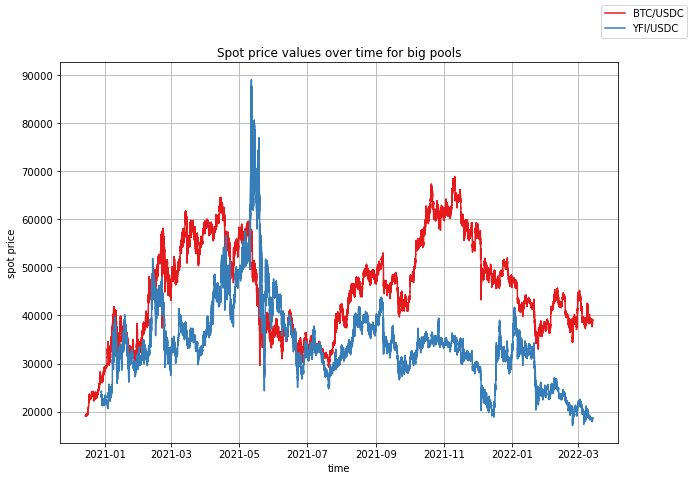

In [29]:
big_pools = ['BTC/USDC', 'YFI/USDC']
medium_pools = ['ETH/USDC', 'MKR/USDC', 'COMP/USDC', 'AAVE/USDC', 'CREAM/USDC']
small_pools = ['DOT/USDC', 'SNX/USDC', 'LINK/USDC',  'SUSHI/USDC', 
               'REN/USDC', 'PERP/USDC', 'UNI/USDC', 'CRV/USDC', 
               'GRT/USDC', 'ALPHA/USDC', 'unknown', 'FTT/USDC']

hued_lineplot(position_changes_df, 'timestamp', 'spot_price', 'amm_name', 
              labels=big_pools, xsize=10, ysize=7,
              xlabel='time', ylabel='spot price',
              title='Spot price values over time for big pools',
              is_grid_required=True)

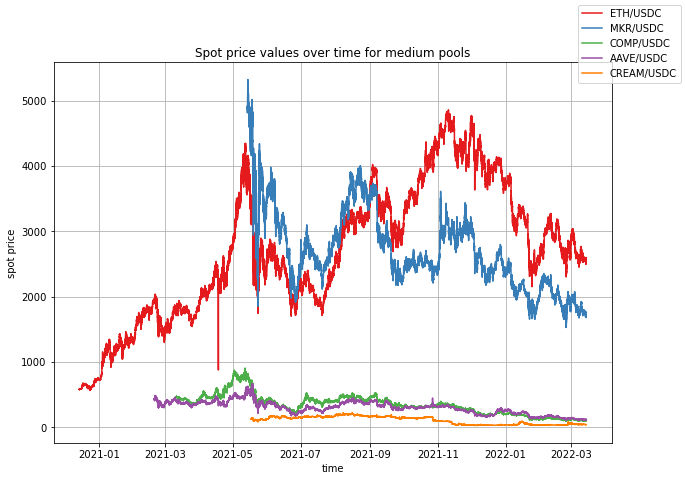

In [30]:
hued_lineplot(position_changes_df, 'timestamp', 'spot_price', 'amm_name', 
              labels=medium_pools, xsize=10, ysize=7,
              xlabel='time', ylabel='spot price', 
              title='Spot price values over time for medium pools',
              is_grid_required=True)

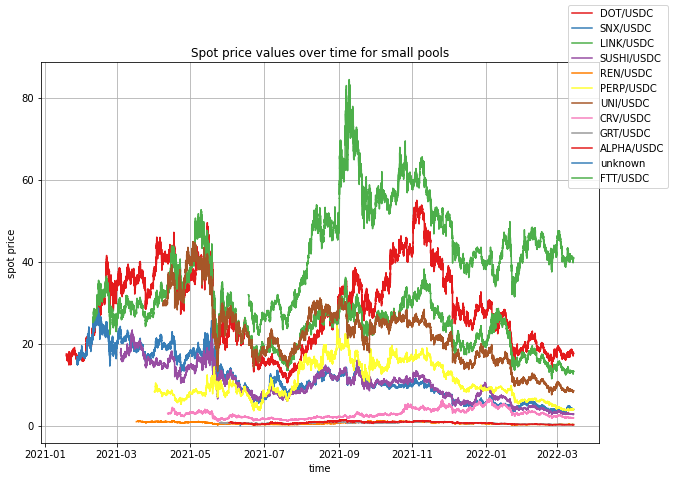

In [31]:
hued_lineplot(position_changes_df, 'timestamp', 'spot_price', 'amm_name', 
              labels=small_pools, xsize=10, ysize=7,
              xlabel='time', ylabel='spot price', 
              title='Spot price values over time for small pools',
              is_grid_required=True)

## Fee distribution depending on the pool size

In [32]:
print('max fee is ' + str(position_changes_df.fee.max()) +
      ' found at the ' + str(position_changes_df[position_changes_df.fee == 
                                                position_changes_df.fee.max()]['amm_name']))

max fee is 800.078417805188 found at the 1233863    ETH/USDC
Name: amm_name, dtype: object


In [33]:
big_pools = ['BTC/USDC', 'YFI/USDC']
medium_pools = ['ETH/USDC', 'MKR/USDC', 'COMP/USDC', 'AAVE/USDC', 'CREAM/USDC']
small_pools = ['DOT/USDC', 'SNX/USDC', 'LINK/USDC',  'SUSHI/USDC', 
               'REN/USDC', 'PERP/USDC', 'UNI/USDC', 'CRV/USDC', 
               'GRT/USDC', 'ALPHA/USDC', 'wtf?', 'FTT/USDC']

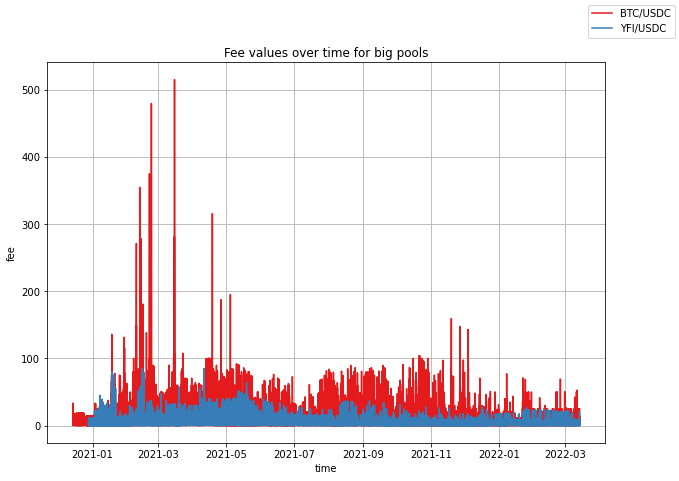

In [34]:
hued_lineplot(position_changes_df, 'timestamp', 'fee', 'amm_name', 
              labels=big_pools, xsize=10, ysize=7,
              xlabel='time', ylabel='fee', 
              title='Fee values over time for big pools',
              is_grid_required=True)

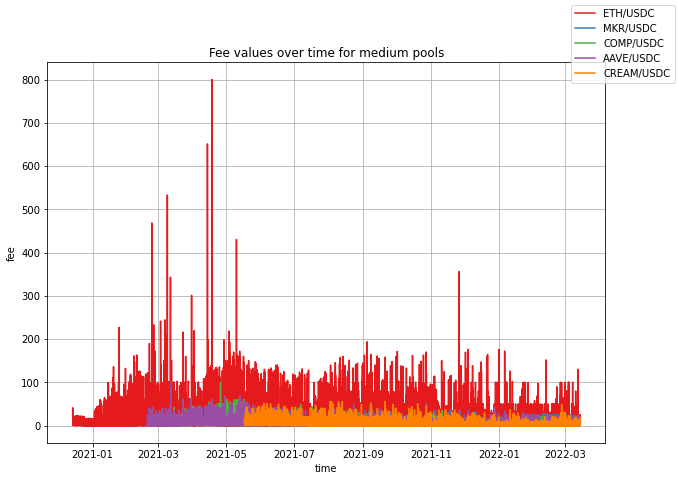

In [35]:
hued_lineplot(position_changes_df, 'timestamp', 'fee', 'amm_name', 
              labels=medium_pools, xsize=10, ysize=7,
              xlabel='time', ylabel='fee', 
              title='Fee values over time for medium pools',
              is_grid_required=True)

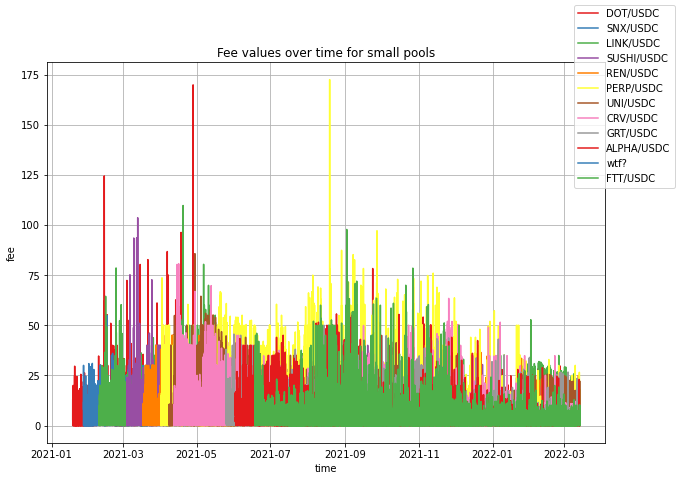

In [36]:
hued_lineplot(position_changes_df, 'timestamp', 'fee', 'amm_name', 
              labels=small_pools, xsize=10, ysize=7,
              xlabel='time', ylabel='fee', 
              title='Fee values over time for small pools',
              is_grid_required=True)

## Margin distribution depending on pool size

In [37]:
print('max margin is ' + str(position_changes_df.margin.max()) +
      ' found at the ' + str(position_changes_df[position_changes_df.margin == 
                                                position_changes_df.margin.max()]['amm_name']))

max margin is 3983028.684572242 found at the 1236168    ETH/USDC
Name: amm_name, dtype: object


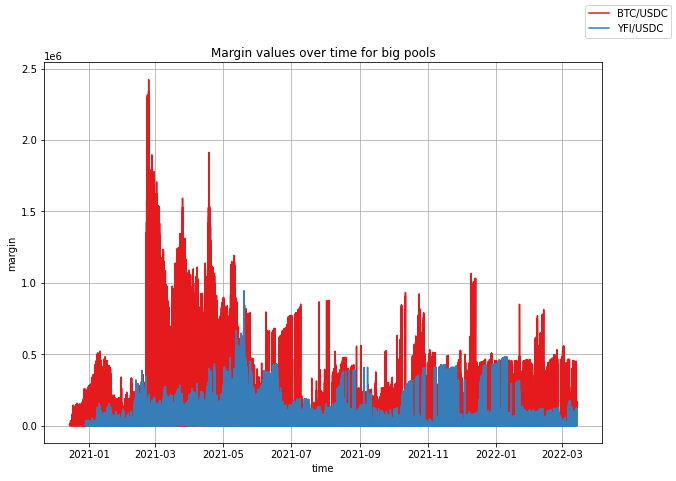

In [38]:
hued_lineplot(position_changes_df, 'timestamp', 'margin', 'amm_name', 
              labels=big_pools, xsize=10, ysize=7,
              xlabel='time', ylabel='margin', 
              title='Margin values over time for big pools',
              is_grid_required=True)

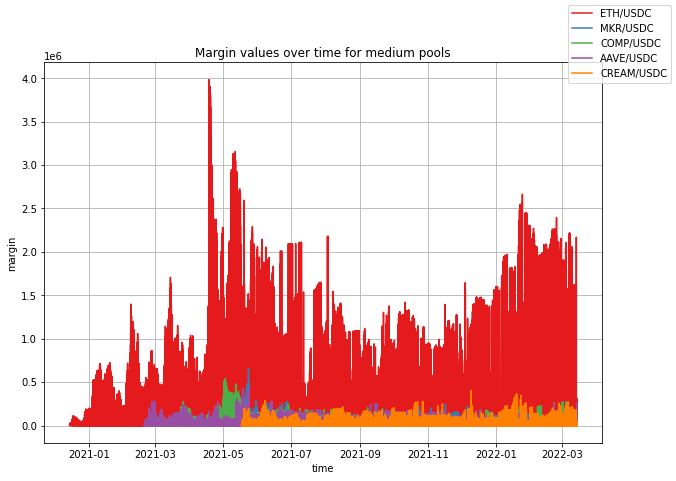

In [39]:
hued_lineplot(position_changes_df, 'timestamp', 'margin', 'amm_name', 
              labels=medium_pools, xsize=10, ysize=7,
              xlabel='time', ylabel='margin', 
              title='Margin values over time for medium pools',
              is_grid_required=True)

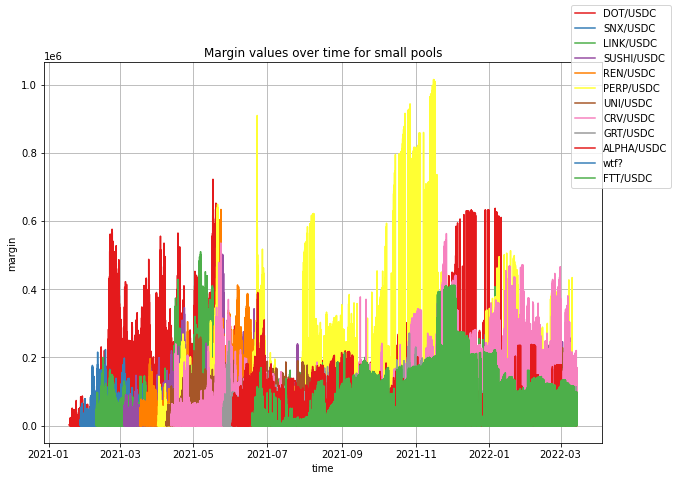

In [40]:
hued_lineplot(position_changes_df, 'timestamp', 'margin', 'amm_name', 
              labels=small_pools, xsize=10, ysize=7,
              xlabel='time', ylabel='margin', 
              title='Margin values over time for small pools',
              is_grid_required=True)

## Position notional distribution depending on pool size

In [41]:
print('max position notional is ' + str(position_changes_df.position_notional.max()) +
      ' found at the ' + str(position_changes_df[position_changes_df.position_notional == 
                                                position_changes_df.position_notional.max()]['amm_name']))

max position notional is 800078.417805188 found at the 1233863    ETH/USDC
Name: amm_name, dtype: object


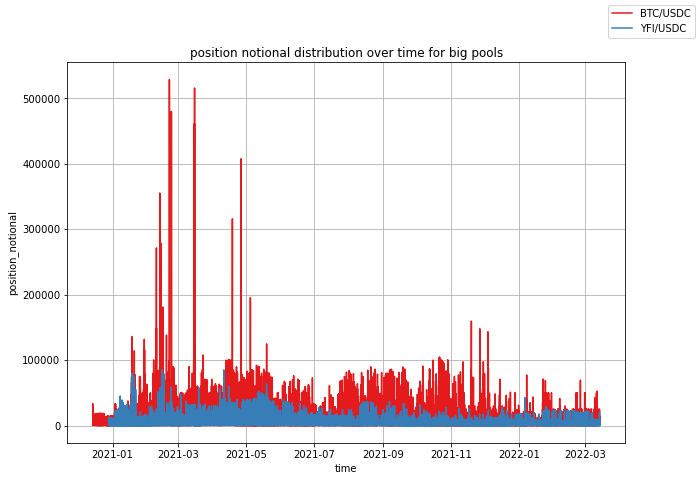

In [42]:
hued_lineplot(position_changes_df, 'timestamp', 'position_notional', 'amm_name', 
              labels=big_pools, xsize=10, ysize=7,
              xlabel='time', ylabel='position_notional', 
              title='position notional distribution over time for big pools',
              is_grid_required=True)

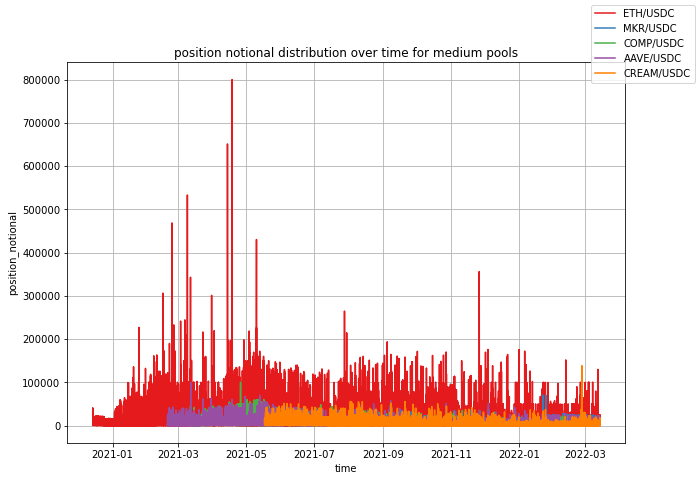

In [43]:
hued_lineplot(position_changes_df, 'timestamp', 'position_notional', 'amm_name', 
              labels=medium_pools, xsize=10, ysize=7,
              xlabel='time', ylabel='position_notional', 
              title='position notional distribution over time for medium pools',
              is_grid_required=True)

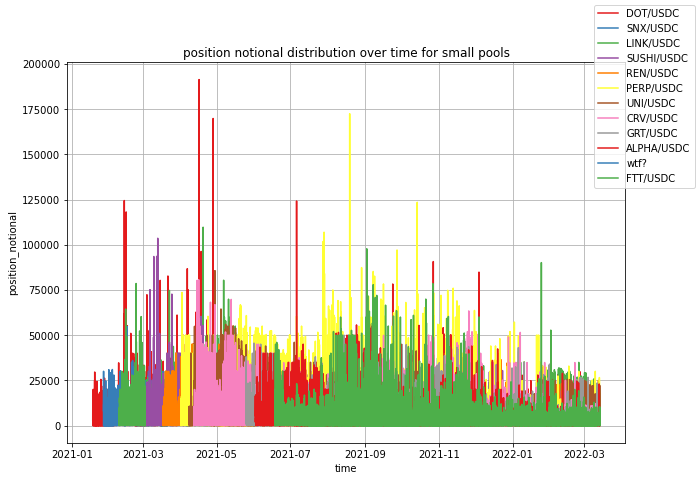

In [44]:
hued_lineplot(position_changes_df, 'timestamp', 'position_notional', 'amm_name', 
              labels=small_pools, xsize=10, ysize=7,
              xlabel='time', ylabel='position_notional', 
              title='position notional distribution over time for small pools',
              is_grid_required=True)

## Exchanged position size distribution depending on pool size

In [45]:
print('max exchanged position size is ' + str(position_changes_df.exchanged_position_size.max()) +
      ' found at the ' + str(position_changes_df[position_changes_df.exchanged_position_size == 
                                                position_changes_df.exchanged_position_size.max()]['amm_name']))
print('min exchanged position size is ' + str(position_changes_df.exchanged_position_size.min()) +
      ' found at the ' + str(position_changes_df[position_changes_df.exchanged_position_size == 
                                                position_changes_df.exchanged_position_size.min()]['amm_name']))

max exchanged position size is 160000.3693766763 found at the 3398788    ALPHA/USDC
Name: amm_name, dtype: object
min exchanged position size is -90905.89722825972 found at the 3079291    ALPHA/USDC
Name: amm_name, dtype: object


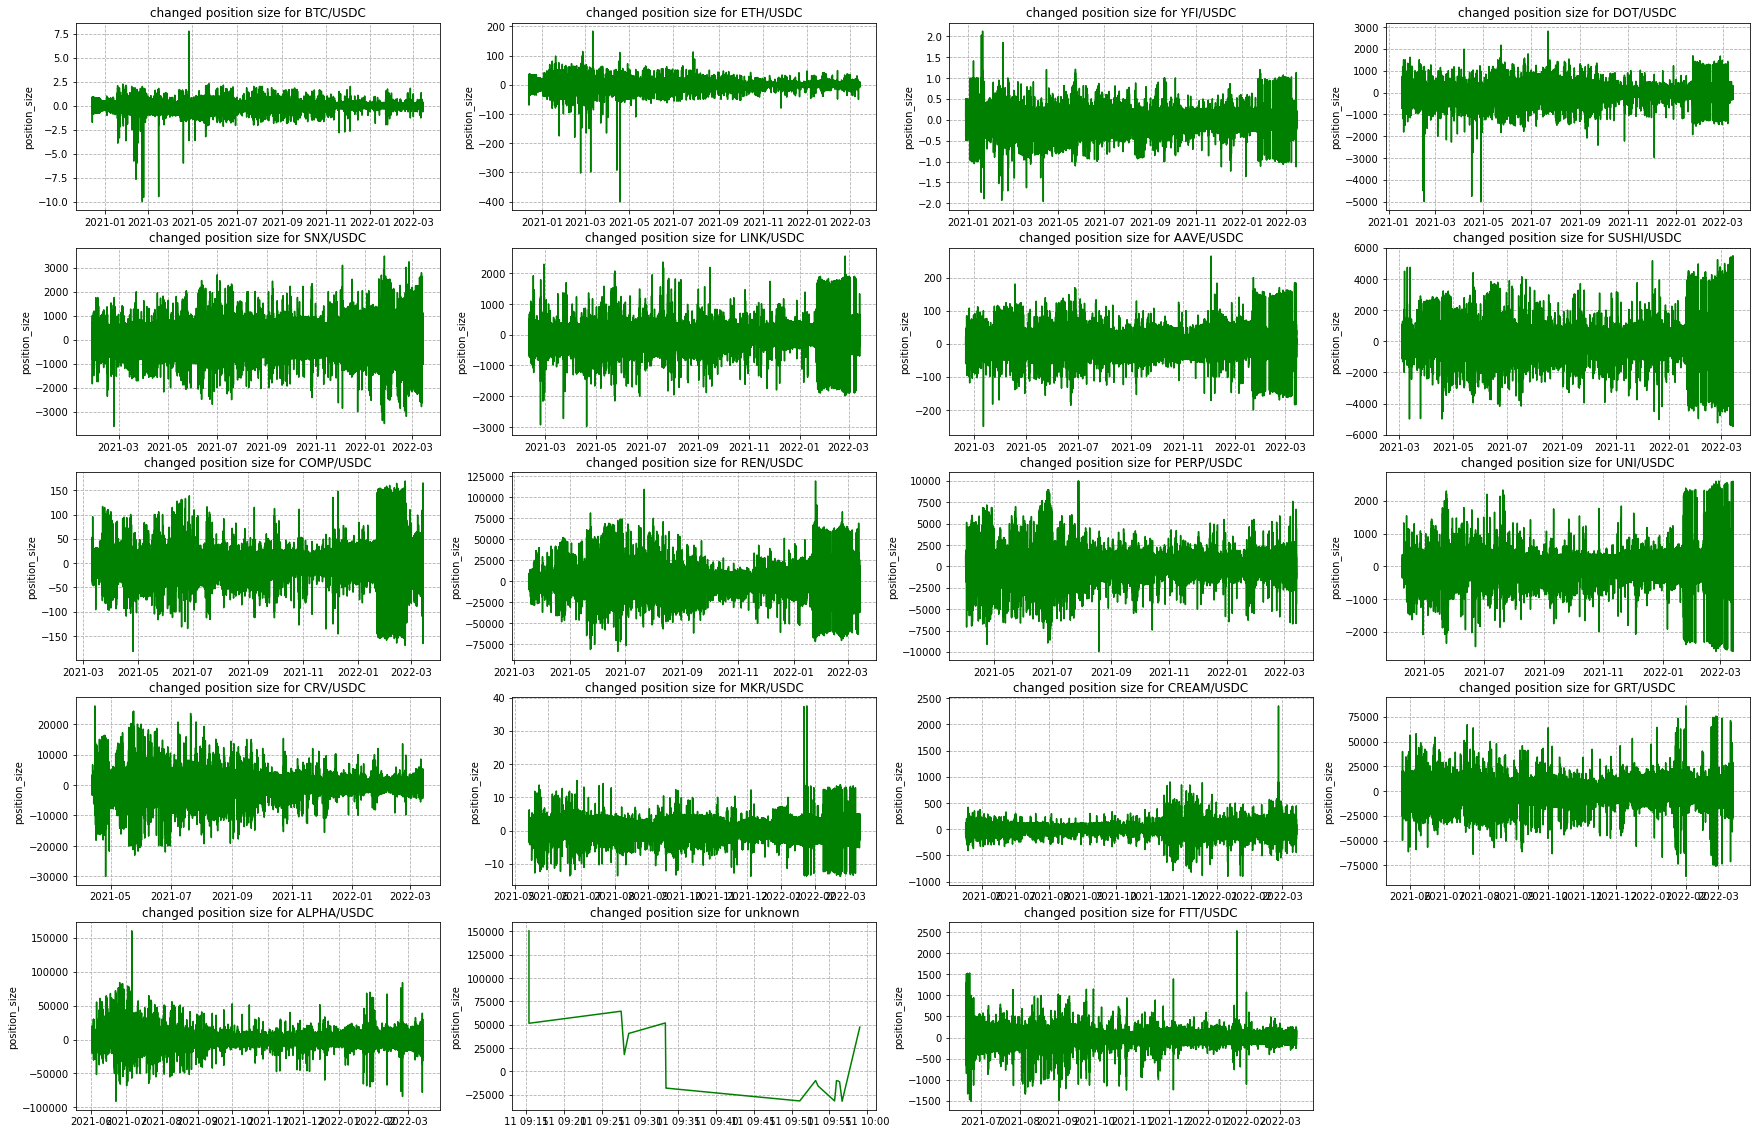

In [46]:
plt.figure(figsize=(30, 20))
index = 0

for amm_name in position_changes_df['amm_name'].unique():
    ax = plt.subplot(5, 4, index+1)
    ax.plot(position_changes_df[position_changes_df['amm_name'] == amm_name]['timestamp'], 
            position_changes_df[position_changes_df['amm_name'] == amm_name]['exchanged_position_size'], color='g')
    ax.set_title('changed position size for ' + amm_name)
    ax.set_ylabel('position_size')
    ax.grid(True, linestyle='--')
    index += 1
    
plt.show()

## Realized PnL distribution depending on pool size

In [47]:
print('max realized PnL is ' + str(position_changes_df.realized_pnl.max()) +
      ' found at the ' + str(position_changes_df[position_changes_df.realized_pnl == 
                                                position_changes_df.realized_pnl.max()]['amm_name']))
print('min realized PnL is ' + str(position_changes_df.realized_pnl.min()) +
      ' found at the ' + str(position_changes_df[position_changes_df.realized_pnl == 
                                                position_changes_df.realized_pnl.min()]['amm_name']))

max realized PnL is 316614.34055719926 found at the 1233863    ETH/USDC
Name: amm_name, dtype: object
min realized PnL is -390802.59025106905 found at the 1230393    ETH/USDC
Name: amm_name, dtype: object


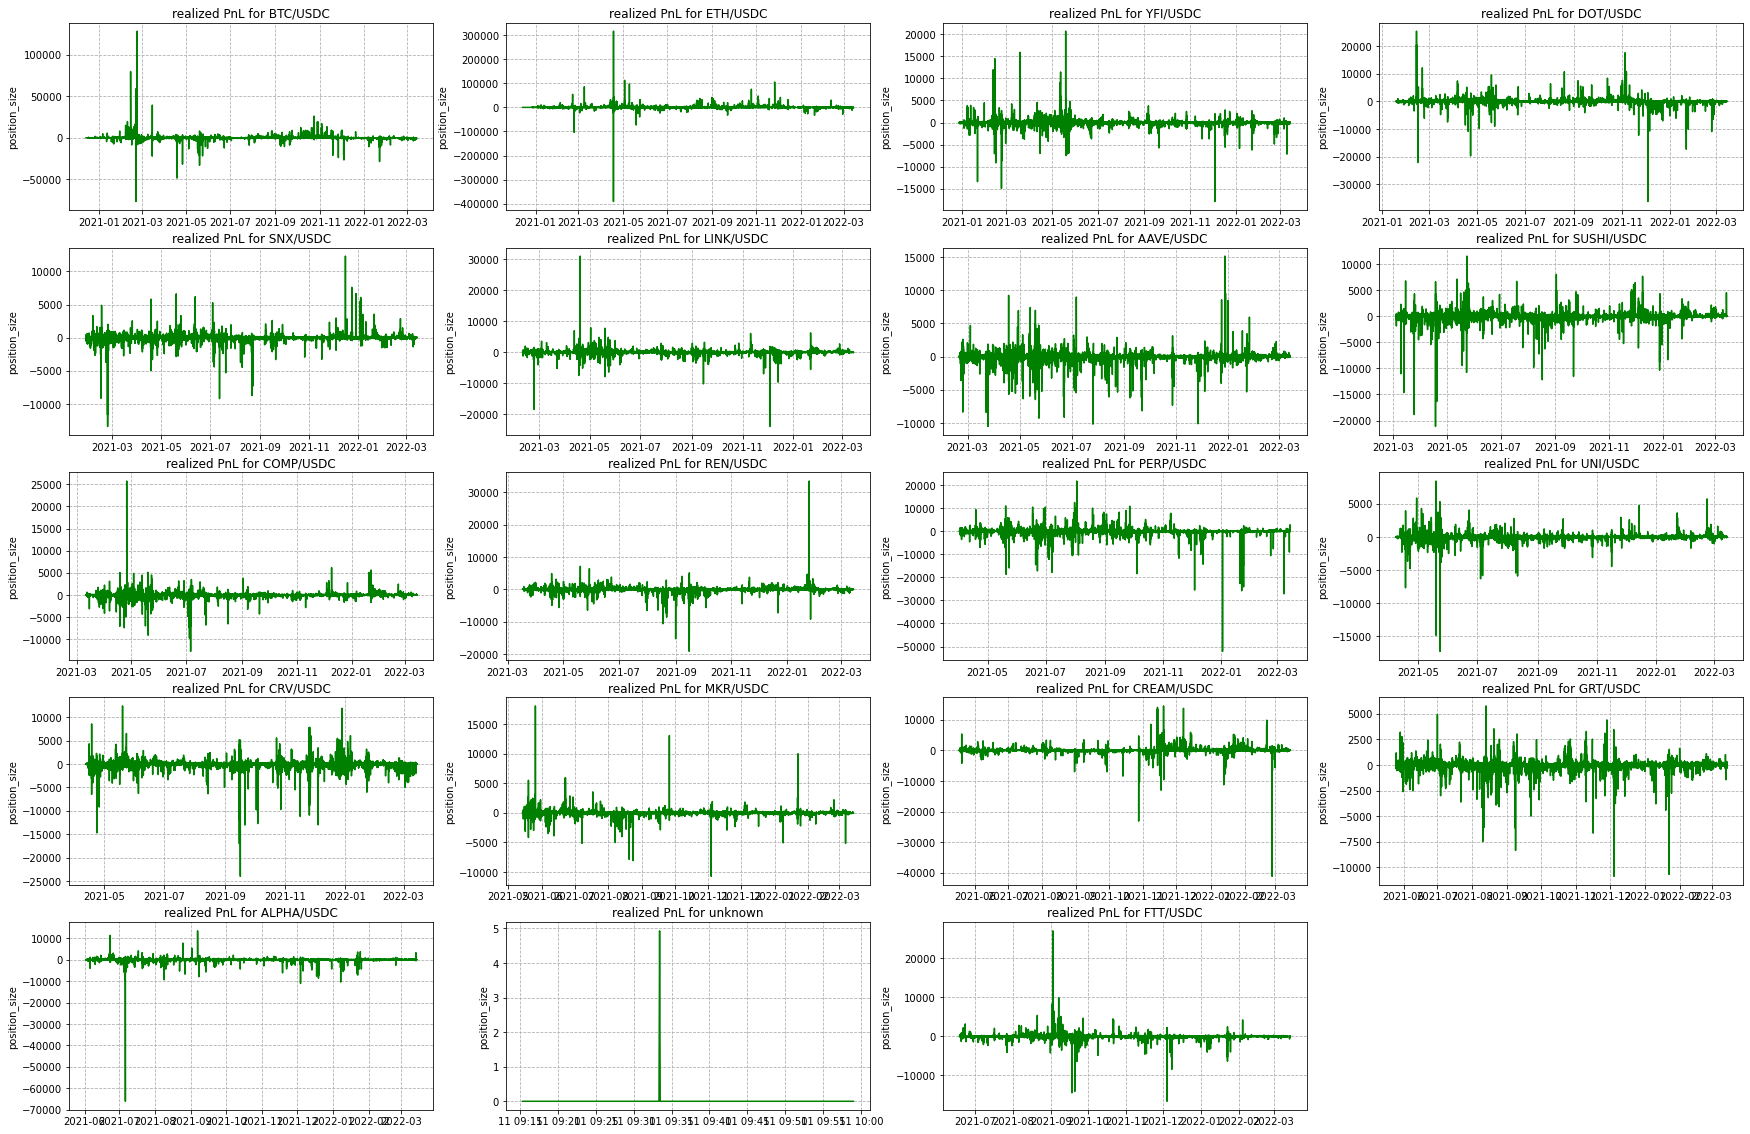

In [48]:
plt.figure(figsize=(30, 20))
index = 0

for amm_name in position_changes_df['amm_name'].unique():
    ax = plt.subplot(5, 4, index+1)
    ax.plot(position_changes_df[position_changes_df['amm_name'] == amm_name]['timestamp'], 
            position_changes_df[position_changes_df['amm_name'] == amm_name]['realized_pnl'], color='g')
    ax.set_title('realized PnL for ' + amm_name)
    ax.set_ylabel('position_size')
    ax.grid(True, linestyle='--')
    index += 1
    
plt.show()

## Bad debt distribution depending on pool size

In [49]:
print('max bad debt is ' + str(position_changes_df.bad_debt.max()) +
      ' found at the ' + str(position_changes_df[position_changes_df.bad_debt == 
                                                position_changes_df.bad_debt.max()]['amm_name']))

max bad debt is 134466.14006818846 found at the 1230393    ETH/USDC
Name: amm_name, dtype: object


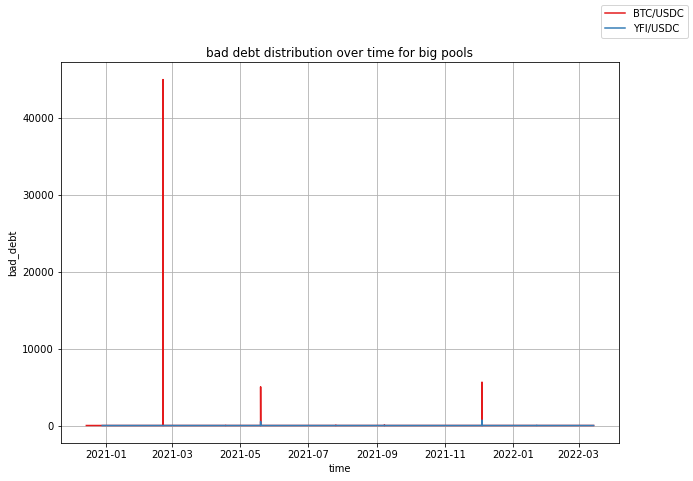

In [50]:
hued_lineplot(position_changes_df, 'timestamp', 'bad_debt', 'amm_name', 
              labels=big_pools, xsize=10, ysize=7,
              xlabel='time', ylabel='bad_debt', 
              title='bad debt distribution over time for big pools',
              is_grid_required=True)

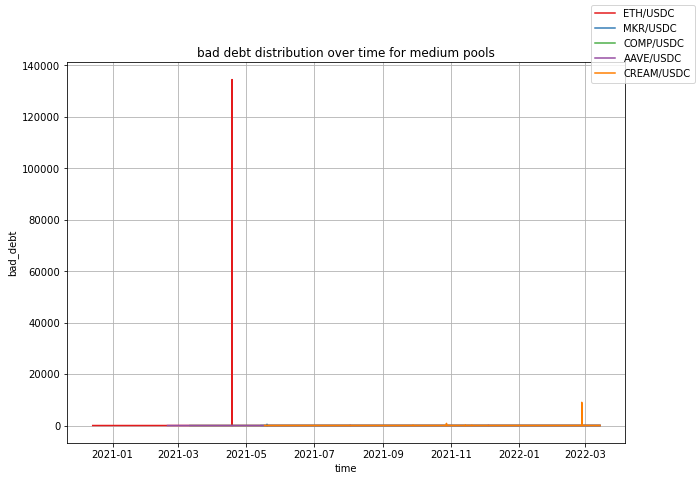

In [51]:
hued_lineplot(position_changes_df, 'timestamp', 'bad_debt', 'amm_name', 
              labels=medium_pools, xsize=10, ysize=7,
              xlabel='time', ylabel='bad_debt', 
              title='bad debt distribution over time for medium pools',
              is_grid_required=True)

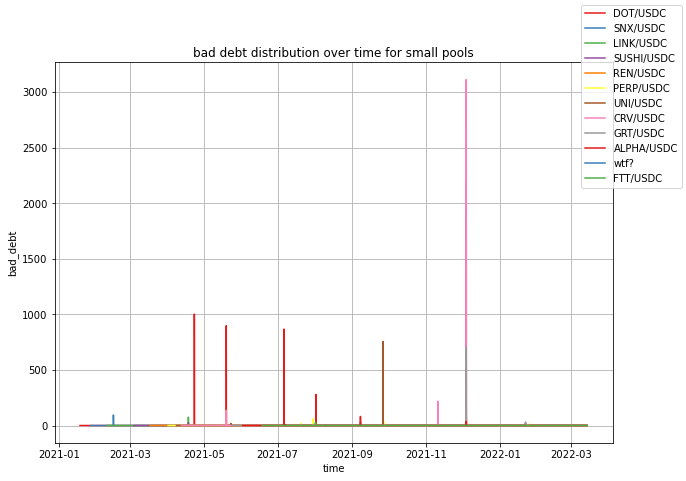

In [52]:
hued_lineplot(position_changes_df, 'timestamp', 'bad_debt', 'amm_name', 
              labels=small_pools, xsize=10, ysize=7,
              xlabel='time', ylabel='bad_debt', 
              title='bad debt distribution over time for small pools',
              is_grid_required=True)

## Liquidation penalty depending on pool size

In [53]:
print('max liquidation penalty is ' + str(position_changes_df.liquidation_penalty.max()) +
      ' found at the ' + str(position_changes_df[position_changes_df.liquidation_penalty == 
                                                position_changes_df.liquidation_penalty.max()]['amm_name']))

max liquidation penalty is 65834.63145743929 found at the 3398788    ALPHA/USDC
Name: amm_name, dtype: object


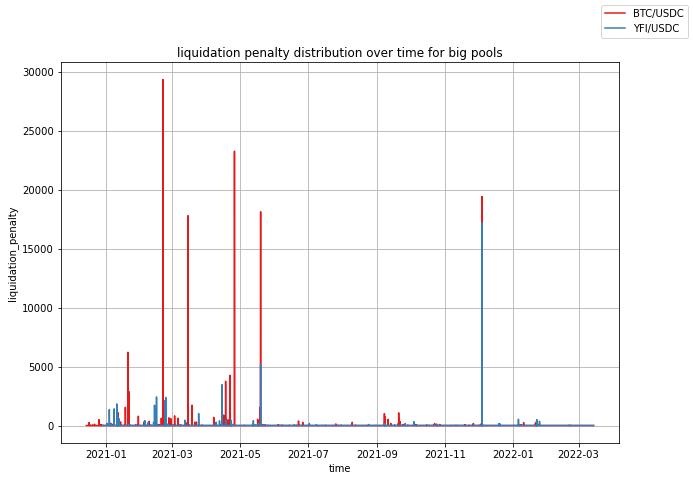

In [54]:
hued_lineplot(position_changes_df, 'timestamp', 'liquidation_penalty', 'amm_name', 
              labels=big_pools, xsize=10, ysize=7,
              xlabel='time', ylabel='liquidation_penalty', 
              title='liquidation penalty distribution over time for big pools',
              is_grid_required=True)

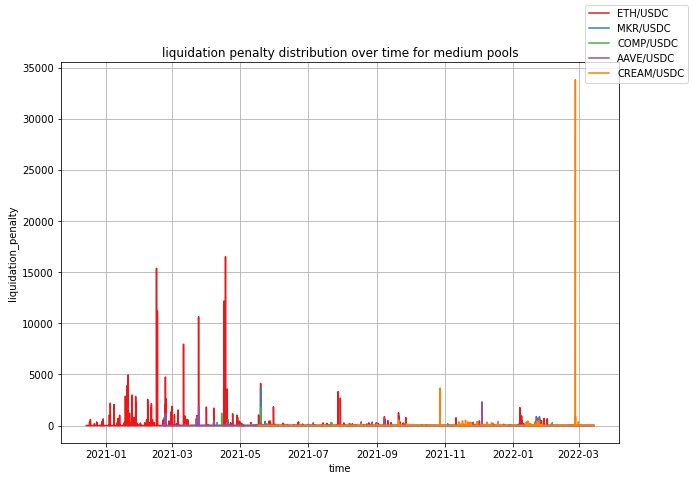

In [55]:
hued_lineplot(position_changes_df, 'timestamp', 'liquidation_penalty', 'amm_name', 
              labels=medium_pools, xsize=10, ysize=7,
              xlabel='time', ylabel='liquidation_penalty', 
              title='liquidation penalty distribution over time for medium pools',
              is_grid_required=True)

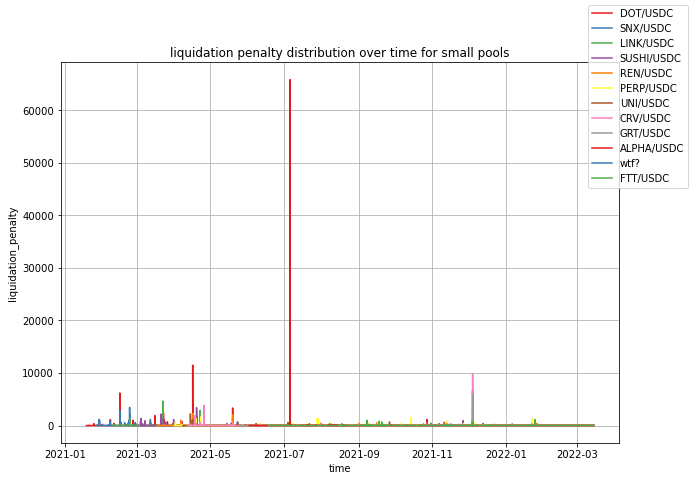

In [56]:
hued_lineplot(position_changes_df, 'timestamp', 'liquidation_penalty', 'amm_name', 
              labels=small_pools, xsize=10, ysize=7,
              xlabel='time', ylabel='liquidation_penalty', 
              title='liquidation penalty distribution over time for small pools',
              is_grid_required=True)

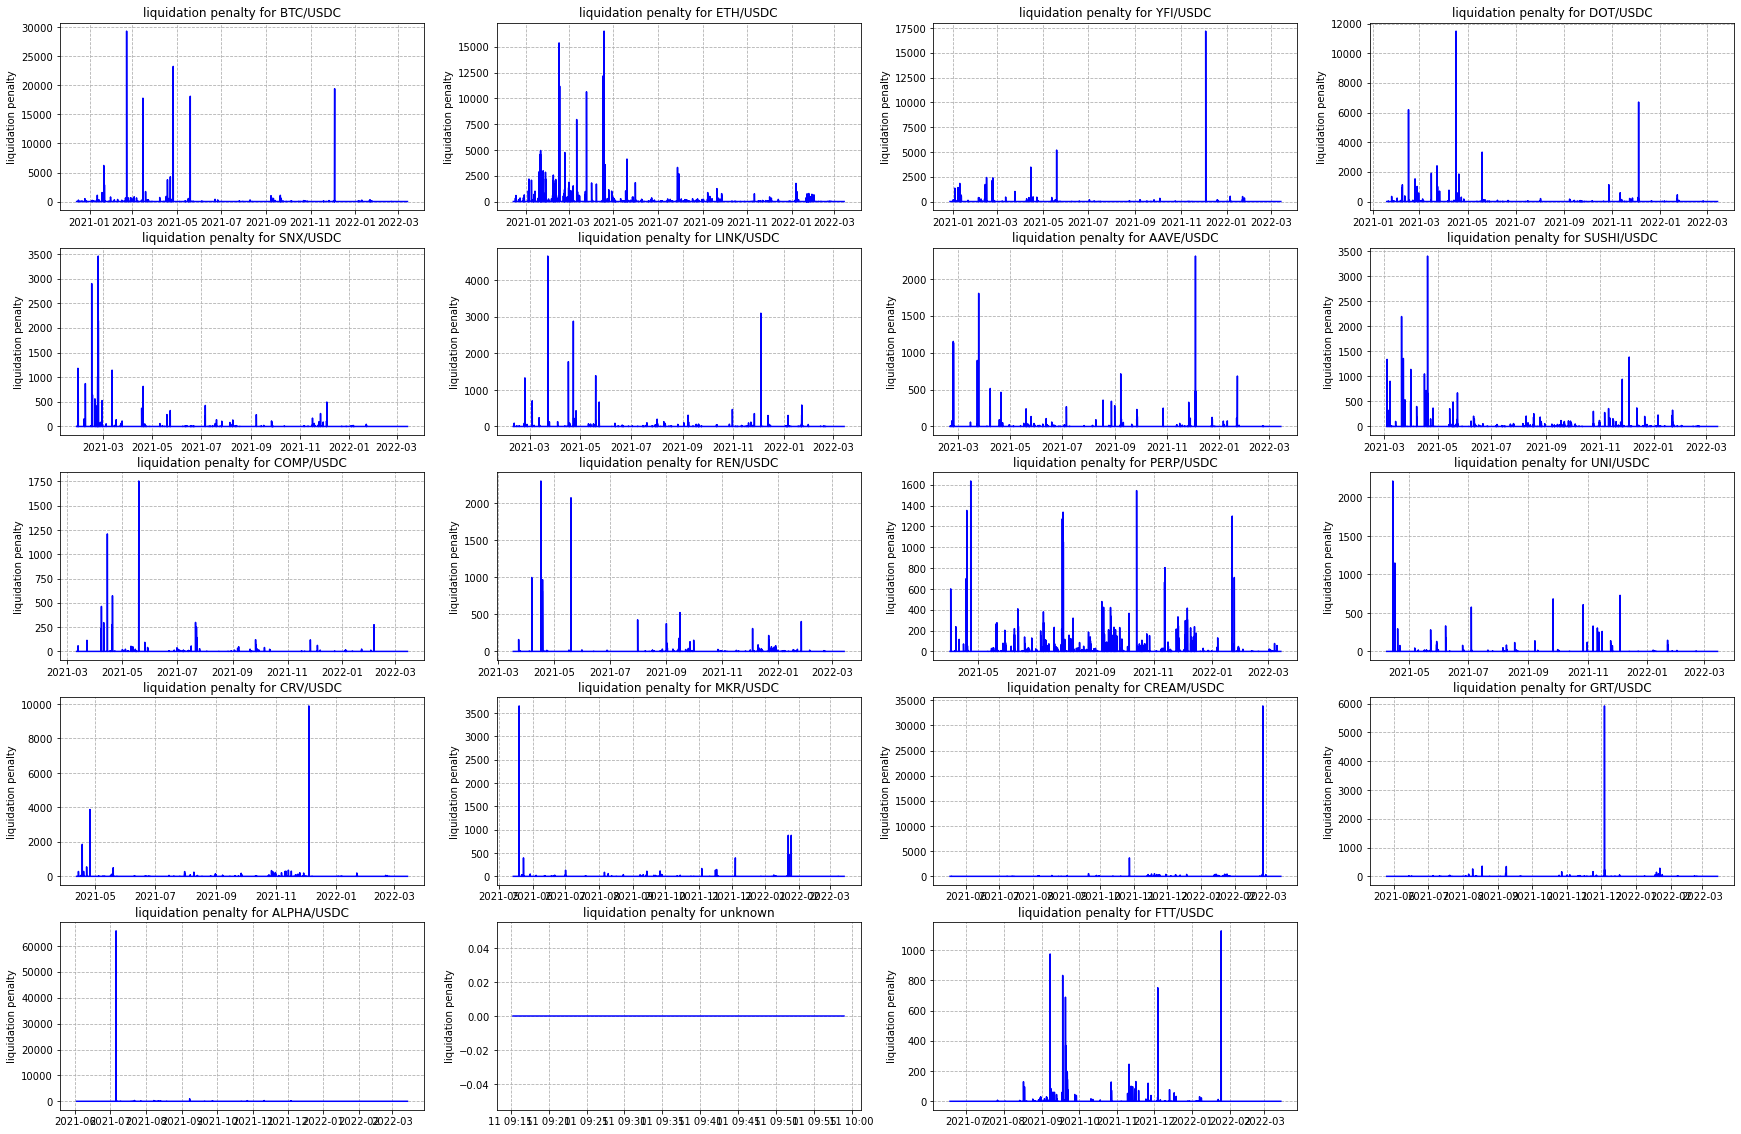

In [57]:
plt.figure(figsize=(30, 20))
index = 0

for amm_name in position_changes_df['amm_name'].unique():
    ax = plt.subplot(5, 4, index+1)
    ax.plot(position_changes_df[position_changes_df['amm_name'] == amm_name]['timestamp'], 
            position_changes_df[position_changes_df['amm_name'] == amm_name]['liquidation_penalty'], color='b')
    ax.set_title('liquidation penalty for ' + amm_name)
    ax.set_ylabel('liquidation penalty')
    ax.grid(True, linestyle='--')
    index += 1
    
plt.show()

## Unrealized PnL after distribution depending on the pool size

In [58]:
print('max unrealized PnL is ' + str(position_changes_df.unrealized_pnl_after.max()) +
      ' found at the ' + str(position_changes_df[position_changes_df.unrealized_pnl_after == 
                                                position_changes_df.unrealized_pnl_after.max()]['amm_name']))
print('min unrealized PnL is ' + str(position_changes_df.unrealized_pnl_after.min()) +
      ' found at the ' + str(position_changes_df[position_changes_df.unrealized_pnl_after == 
                                                position_changes_df.unrealized_pnl_after.min()]['amm_name']))

max unrealized PnL is 2011368.1118304397 found at the 6429175    ETH/USDC
Name: amm_name, dtype: object
min unrealized PnL is -2740810.570642395 found at the 1260946    ETH/USDC
Name: amm_name, dtype: object


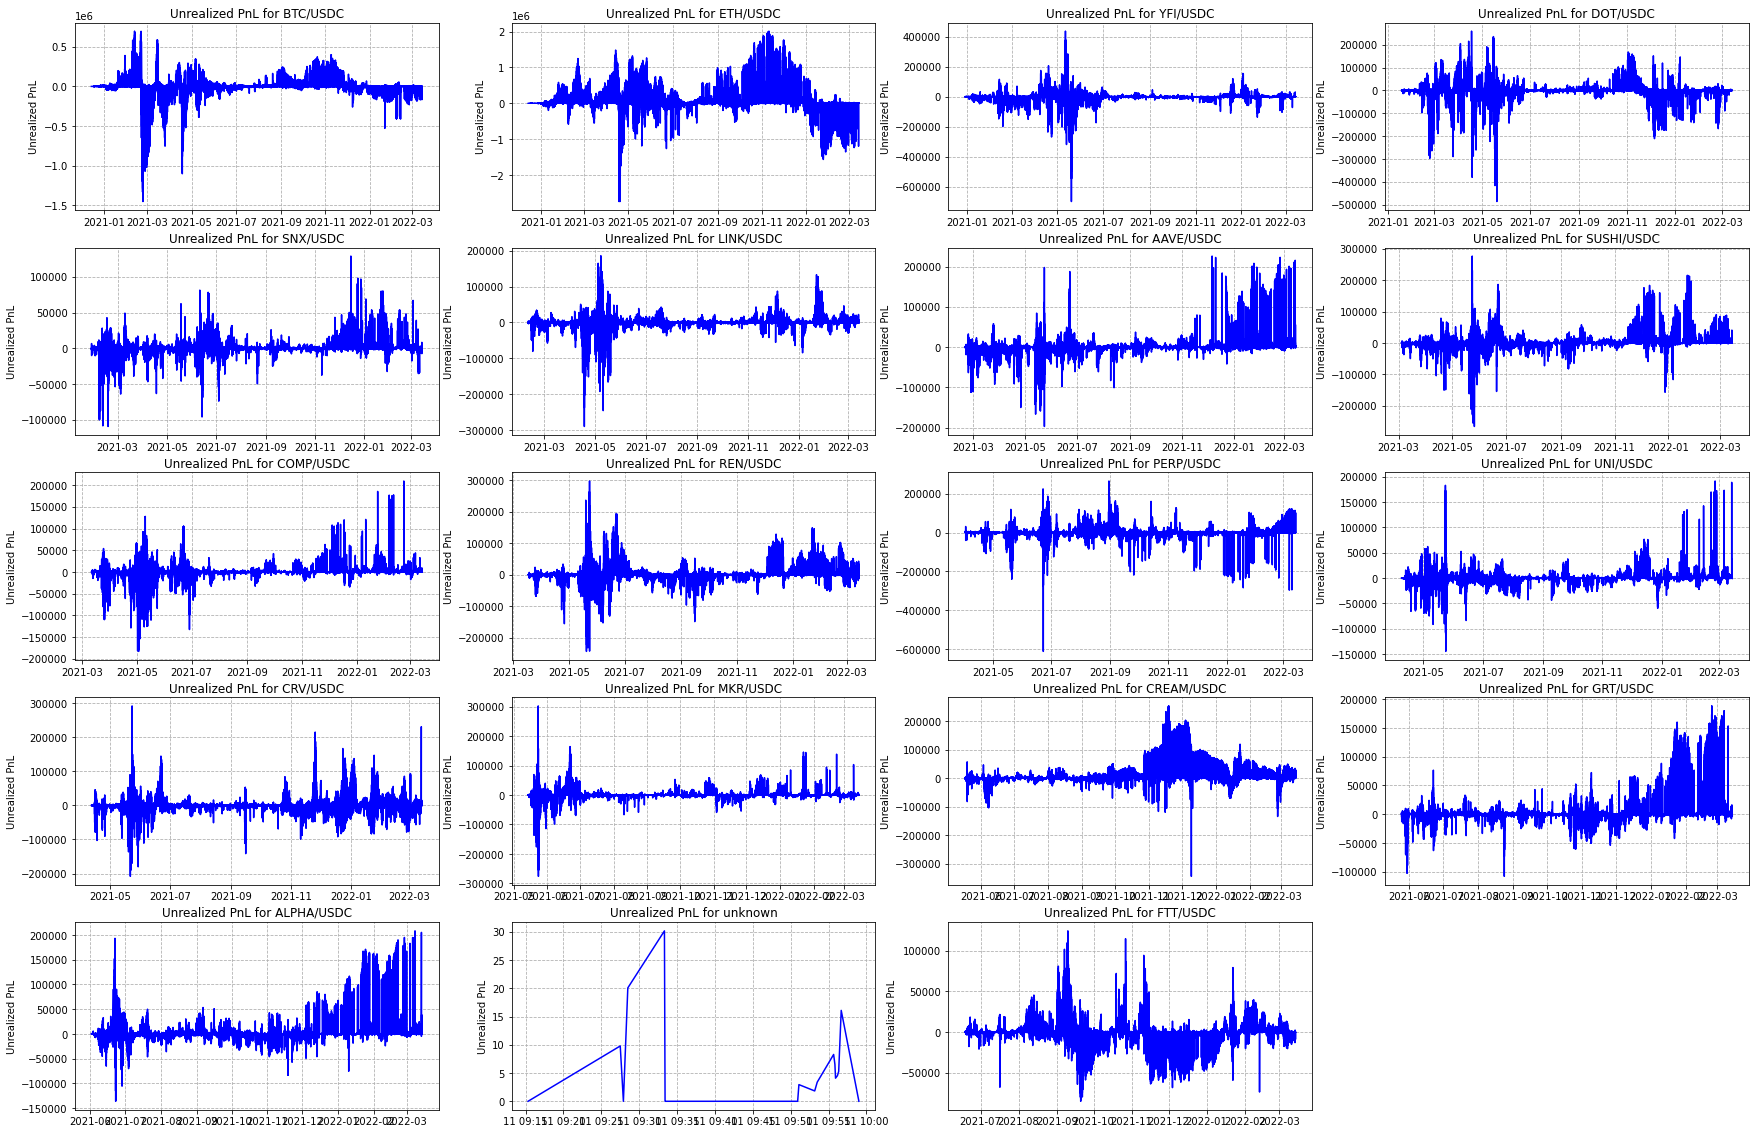

In [59]:
plt.figure(figsize=(30, 20))
index = 0

for amm_name in position_changes_df['amm_name'].unique():
    ax = plt.subplot(5, 4, index+1)
    ax.plot(position_changes_df[position_changes_df['amm_name'] == amm_name]['timestamp'], 
            position_changes_df[position_changes_df['amm_name'] == amm_name]['unrealized_pnl_after'], color='b')
    ax.set_title('Unrealized PnL for ' + amm_name)
    ax.set_ylabel('Unrealized PnL')
    ax.grid(True, linestyle='--')
    index += 1
    
plt.show()

# Forming price histories for each pool

For each of the pools presented in the list below is formed a price history depending on the discovered spot price at the moment of new changes called by trader

In [60]:
replacement_map = {'0x0f346e19f01471c02485df1758cfd3d624e399b4': 'BTC/USDC',
                      '0x8d22f1a9dce724d8c1b4c688d75f17a2fe2d32df': 'ETH/USDC',
                      '0xd41025350582674144102b74b8248550580bb869': 'YFI/USDC',
                      '0x6de775aabeeede8efdb1a257198d56a3ac18c2fd': 'DOT/USDC',
                      '0xb397389b61cbf3920d297b4ea1847996eb2ac8e8': 'SNX/USDC',
                      '0x80daf8abd5a6ba182033b6464e3e39a0155dcc10': 'LINK/USDC',
                      '0x16a7ecf2c27cb367df36d39e389e66b42000e0df': 'AAVE/USDC',
                      '0xf559668108ff57745d5e3077b0a7dd92ffc6300c': 'SUSHI/USDC',
                      '0x33fbaefb2dcc3b7e0b80afbb4377c2eb64af0a3a': 'COMP/USDC',
                      '0x922f28072babe6ea0c0c25ccd367fda0748a5ec7': 'REN/USDC',
                      '0xfcae57db10356fcf76b6476b21ac14c504a45128': 'PERP/USDC',
                      '0xeac6cee594edd353351babc145c624849bb70b11': 'UNI/USDC',
                      '0xab08ff2c726f2f333802630ee19f4146385cc343': 'CRV/USDC',
                      '0xb48f7accc03a3c64114170291f352b37eea26c0b': 'MKR/USDC',
                      '0x7b479a0a816ca33f8eb5a3312d1705a34d2d4c82': 'CREAM/USDC',
                      '0x187c938543f2bde09fe39034fe3ff797a3d35ca0': 'GRT/USDC',
                      '0x26789518695b56e16f14008c35dc1b281bd5fc0e': 'ALPHA/USDC',
                      '0xf9e30f08a738620bc2331f728de4dac7937888d3': 'wtf?',
                      '0x838b322610bd99a449091d3bf3fba60d794909a9': 'FTT/USDC'}

In [61]:
for amm_name in position_changes_df['amm_name'].unique():
    if amm_name != 'wtf?':
        price_df = position_changes_df[position_changes_df['amm_name'] == amm_name][
                                    ['timestamp', 'spot_price']].reset_index().drop(columns=['index'])
        token_name = amm_name.split("/")
        price_df.to_csv(fr"{token_name[0]}_price.csv")
        print(fr"formed a price story for {token_name[0]} token")

formed a price story for BTC token
formed a price story for ETH token
formed a price story for YFI token
formed a price story for DOT token
formed a price story for SNX token
formed a price story for LINK token
formed a price story for AAVE token
formed a price story for SUSHI token
formed a price story for COMP token
formed a price story for REN token
formed a price story for PERP token
formed a price story for UNI token
formed a price story for CRV token
formed a price story for MKR token
formed a price story for CREAM token
formed a price story for GRT token
formed a price story for ALPHA token
formed a price story for unknown token
formed a price story for FTT token


# Checking intermediate liquidations

In [62]:
traders_for_check = ['0x1a48776f436bcdaa16845a378666cf4ba131eb0f',
                     '0x9602686bf53a17baed60c48ba34ed4219a532381',
                     '0x5bea7caa02142ba59885466757e1112819731f09',
                     '0x3f84e391ea8dc12946e17d1d85cdf0b35d4fe650',
                     '0x43bd90e4cc93d6e40580507102cc7b1bc8a25284',
                     '0xa7f43e1ae864f3fee6d95e9990b9bbdb043dae27',
                     '0x069a67b8f965d02d095be12ae55e31e769692df4']
for trader in traders_for_check:
    print("there are " + str(len(position_changes_df[position_changes_df['trader'] == trader])) + 
          " position changes for trader " + str(trader))

there are 866293 position changes for trader 0x1a48776f436bcdaa16845a378666cf4ba131eb0f
there are 31 position changes for trader 0x9602686bf53a17baed60c48ba34ed4219a532381
there are 76 position changes for trader 0x5bea7caa02142ba59885466757e1112819731f09
there are 144 position changes for trader 0x3f84e391ea8dc12946e17d1d85cdf0b35d4fe650
there are 14 position changes for trader 0x43bd90e4cc93d6e40580507102cc7b1bc8a25284
there are 80 position changes for trader 0xa7f43e1ae864f3fee6d95e9990b9bbdb043dae27
there are 205 position changes for trader 0x069a67b8f965d02d095be12ae55e31e769692df4


## Fee distribution of the intermediate liquidations

In [ ]:
big_pools = ['BTC/USDC', 'YFI/USDC']
medium_pools = ['ETH/USDC', 'MKR/USDC', 'COMP/USDC', 'AAVE/USDC', 'CREAM/USDC']
small_pools = ['DOT/USDC', 'SNX/USDC', 'LINK/USDC',  'SUSHI/USDC', 
               'REN/USDC', 'PERP/USDC', 'UNI/USDC', 'CRV/USDC', 
               'GRT/USDC', 'ALPHA/USDC', 'wtf?', 'FTT/USDC']

hued_lineplot(intermediate_liquidations_df, 'timestamp', 'fee', 'amm_name', 
              labels=big_pools, xsize=7, ysize=5,
              xlabel='time', ylabel='fee', 
              title='fee distribution over time for intermediate liquidations',
              is_grid_required=True)

In [ ]:
hued_lineplot(intermediate_liquidations_df, 'timestamp', 'fee', 'amm_name', 
              labels=medium_pools, xsize=10, ysize=7,
              xlabel='time', ylabel='fee', 
              title='fee distribution over time for intermediate liquidations',
              is_grid_required=True)

In [ ]:
hued_lineplot(intermediate_liquidations_df, 'timestamp', 'fee', 'amm_name', 
              labels=small_pools, xsize=10, ysize=7,
              xlabel='time', ylabel='fee', 
              title='fee distribution over time for intermediate liquidations',
              is_grid_required=True)

## Changed position sizes distributions for intermediate liquidations

In [ ]:
hued_lineplot(intermediate_liquidations_df, 'timestamp', 'exchanged_position_size', 'amm_name', 
              labels=big_pools, xsize=10, ysize=7,
              xlabel='time', ylabel='exchanged_position_size', 
              title='exchanged_position_size distribution over time for intermediate liquidations',
              is_grid_required=True)

In [ ]:
hued_lineplot(intermediate_liquidations_df, 'timestamp', 'exchanged_position_size', 'amm_name', 
              labels=medium_pools, xsize=10, ysize=7,
              xlabel='time', ylabel='exchanged_position_size', 
              title='exchanged_position_size distribution over time for intermediate liquidations',
              is_grid_required=True)

In [ ]:
hued_lineplot(intermediate_liquidations_df, 'timestamp', 'exchanged_position_size', 'amm_name', 
              labels=small_pools, xsize=10, ysize=7,
              xlabel='time', ylabel='exchanged_position_size', 
              title='exchanged_position_size distribution over time for intermediate liquidations',
              is_grid_required=True)

## Position notional distribution for intermediate liquidations

In [ ]:
hued_lineplot(intermediate_liquidations_df, 'timestamp', 'position_notional', 'amm_name', 
              labels=big_pools, xsize=10, ysize=7,
              xlabel='time', ylabel='position_notional', 
              title='position_notional distribution over time for intermediate liquidations',
              is_grid_required=True)

In [ ]:
hued_lineplot(intermediate_liquidations_df, 'timestamp', 'position_notional', 'amm_name', 
              labels=medium_pools, xsize=10, ysize=7,
              xlabel='time', ylabel='position_notional', 
              title='position_notional distribution over time for intermediate liquidations',
              is_grid_required=True)

In [ ]:
hued_lineplot(intermediate_liquidations_df, 'timestamp', 'position_notional', 'amm_name', 
              labels=small_pools, xsize=10, ysize=7,
              xlabel='time', ylabel='position_notional', 
              title='position_notional distribution over time for intermediate liquidations',
              is_grid_required=True)

## Realized Profit n Loss for intermediate liquidations

In [ ]:
hued_lineplot(intermediate_liquidations_df, 'timestamp', 'realized_pnl', 'amm_name', 
              labels=big_pools, xsize=10, ysize=7,
              xlabel='time', ylabel='realized_pnl', 
              title='realized_pnl distribution over time for intermediate liquidations',
              is_grid_required=True)

In [ ]:
hued_lineplot(intermediate_liquidations_df, 'timestamp', 'realized_pnl', 'amm_name', 
              labels=medium_pools, xsize=10, ysize=7,
              xlabel='time', ylabel='realized_pnl', 
              title='realized_pnl distribution over time for intermediate liquidations',
              is_grid_required=True)

In [ ]:
hued_lineplot(intermediate_liquidations_df, 'timestamp', 'realized_pnl', 'amm_name', 
              labels=small_pools, xsize=10, ysize=7,
              xlabel='time', ylabel='realized_pnl', 
              title='realized_pnl distribution over time for intermediate liquidations',
              is_grid_required=True)

# Some general characteristics

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

big_pools = ['BTC/USDC', 'YFI/USDC']
medium_pools = ['ETH/USDC', 'MKR/USDC', 'COMP/USDC', 'AAVE/USDC', 'CREAM/USDC']
small_pools = ['DOT/USDC', 'SNX/USDC', 'LINK/USDC',  'SUSHI/USDC', 
               'REN/USDC', 'PERP/USDC', 'UNI/USDC', 'CRV/USDC', 
               'GRT/USDC', 'ALPHA/USDC', 'wtf?', 'FTT/USDC']

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(position_changes_df.corr(), annot=True)
plt.show()

In [ ]:
numerical_columns = ['margin', 'position_notional', 'exchanged_position_size', 'fee',
                     'position_size_after', 'unrealized_pnl_after', 'liquidation_penalty',
                     'spot_price', 'funding_payment', 'block_number']
target = ['realized_pnl']

In [ ]:
position_changes_df['margin_to_position_notional_coef'] = (position_changes_df['margin'] /
                                                            position_changes_df['position_notional'])
print(min(position_changes_df['margin_to_position_notional_coef']))
print(max(position_changes_df['margin_to_position_notional_coef']))
print(np.mean(position_changes_df['margin_to_position_notional_coef']))
print(np.median(position_changes_df['margin_to_position_notional_coef']))

## Margin to position notional coefficient

In [ ]:
position_changes_df['margin_to_position_notional_coef'] = (position_changes_df['margin'] /
                                                            position_changes_df['position_notional'])

fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(position_changes_df[position_changes_df['margin_to_position_notional_coef'] < 1000000]['timestamp'], 
        position_changes_df[position_changes_df['margin_to_position_notional_coef'] < 1000000]['margin_to_position_notional_coef'],
        color='r')
ax.set_xlabel('time')
ax.set_ylabel('margin to position capital coefficient')
ax.set_title('coefficient of margin to position capital')
plt.show()

In [ ]:
hued_lineplot(position_changes_df[position_changes_df['margin_to_position_notional_coef'] < 1000000],
              'timestamp', 'margin_to_position_notional_coef', 'amm_name', big_pools, xsize=10, ysize=7,
              xlabel='time', ylabel='coefficient', title='margin to position capital coefficient')

In [ ]:
hued_lineplot(position_changes_df[position_changes_df['margin_to_position_notional_coef'] < 1000000],
              'timestamp', 'margin_to_position_notional_coef', 'amm_name', small_pools, xsize=10, ysize=7,
              xlabel='time', ylabel='coefficient', title='margin to position capital coefficient')

## Position notional to margin coefficient

In [ ]:
position_changes_df['position_notional_to_margin_coef'] = (position_changes_df['position_notional'] /
                                                            position_changes_df['margin'])

fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(position_changes_df[position_changes_df['position_notional_to_margin_coef'] < 100000000]['timestamp'], 
        position_changes_df[position_changes_df['position_notional_to_margin_coef'] < 100000000]['position_notional_to_margin_coef'],
        color='r')
ax.set_xlabel('time')
ax.set_ylabel('position notional to margin coefficient')
ax.set_title('coefficient')
ax.grid(True, linestyle='--')
plt.show()

In [ ]:
hued_lineplot(position_changes_df[position_changes_df['position_notional_to_margin_coef'] < 100000000],
              'timestamp', 'position_notional_to_margin_coef', 'amm_name', big_pools, xsize=10, ysize=7,
              xlabel='time', ylabel='coefficient', is_grid_required=True, title='position capital to margin')

In [ ]:
hued_lineplot(position_changes_df[position_changes_df['position_notional_to_margin_coef'] < 100000000],
              'timestamp', 'position_notional_to_margin_coef', 'amm_name', medium_pools, xsize=10, ysize=7,
              xlabel='time', ylabel='coefficient', is_grid_required=True, title='position capital to margin')

In [ ]:
hued_lineplot(position_changes_df[position_changes_df['position_notional_to_margin_coef'] < 100000000],
              'timestamp', 'position_notional_to_margin_coef', 'amm_name', small_pools, xsize=10, ysize=7,
              xlabel='time', ylabel='coefficient', is_grid_required=True, title='position capital to margin')

In [ ]:
position_changes_df[position_changes_df['trader'] == '0x1a48776f436bcdaa16845a378666cf4ba131eb0f']

Check for work of the OLS model

In [ ]:
%%time
results = sm.OLS(position_changes_df[target], position_changes_df[numerical_columns]).fit()
print(results.summary())

In [ ]:
position_changes_df.describe().T

In [ ]:
position_changes_df[position_changes_df['trader'] == positions_df.iloc[16]['trader']]

In [ ]:
position_changes_df[position_changes_df['position_size_after'] == 0]

In [ ]:
position_changes_df

In [ ]:
position_changes_df['shifted_margin'] = position_changes_df.shift(1)['margin']
position_changes_df.loc[position_changes_df[position_changes_df['position_size_after'] == 0].index, 'margin'] = position_changes_df.loc[position_changes_df[position_changes_df['position_size_after'] == 0].index, 'shifted_margin']
position_changes_df

In [ ]:
position_changes_df[position_changes_df['margin'] < 1]

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(position_changes_df['timestamp'], 
        position_changes_df['margin'],
        color='r')
ax.set_xlabel('time')
ax.set_ylabel('margin')
ax.set_title('margin values over time')
plt.show()

In [ ]:
hued_lineplot(df=position_changes_df, column_1='timestamp', column_2='margin',
              hued_column='amm_name', labels=big_pools,
              xlabel='time', ylabel='margin', title='margin values over time',
              xsize=10, ysize=7, is_grid_required=True)

## Daily changes count

In [ ]:
daily_info_df = pd.to_datetime(position_changes_df['timestamp']).dt.floor('d').value_counts().rename_axis('date').reset_index(
                name='count')
daily_info_df.sort_values(by=['date'], inplace=True)

fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(daily_info_df['date'], daily_info_df['count'], color='g')
ax.set_xlabel('time')
ax.set_ylabel('count')
ax.set_title('operations count over time')
ax.grid(True, linestyle='--')
plt.show()

### Daily position changes count per AMM

In [ ]:
plt.subplots(figsize=(30, 20))
index = 0

for amm in position_changes_df['amm_name'].unique():
    ax = plt.subplot(5, 4, index + 1)
    amm_count_df = pd.to_datetime(position_changes_df[position_changes_df['amm_name'] == amm]['timestamp']).dt.floor('d').value_counts(
                                                                                ).rename_axis('date').reset_index(name='count')
    amm_count_df.sort_values(by=['date'], inplace=True)
    ax.plot(amm_count_df['date'], amm_count_df['count'], color='r')
    ax.set_ylabel('count')
    ax.set_title('count for ' + amm)
    ax.grid(True, linestyle='--')
    index += 1

### Partial and total liquidations

In [ ]:
%%time
plt.subplots(figsize=(35, 23))
index = 0

for amm in position_changes_df['amm_name'].unique():
    ax = plt.subplot(5, 4, index + 1)
    amm_count_df = pd.to_datetime(position_changes_df[(position_changes_df['amm_name'] == amm) & 
                                                      (position_changes_df['position_size_after'] == 0)]['timestamp']).dt.floor(
        'd').value_counts().rename_axis('date').reset_index(name='count')
    amm_count_df.sort_values(by=['date'], inplace=True)
    ax.plot(amm_count_df['date'], amm_count_df['count'], color='g')
    ax.set_ylabel('operations count')
    ax.set_title('partial and total liquidations for ' + amm)
    ax.grid(True, linestyle='--')
    index += 1

fig.tight_layout()
plt.show()

In [ ]:
openings_value = len(position_changes_df[(position_changes_df['amm_name'] == 'ETH/USDC') & 
                    (position_changes_df['position_size_after'] == position_changes_df['exchanged_position_size'])])
closings_value = len(position_changes_df[(position_changes_df['amm_name'] == 'ETH/USDC') & 
                    (position_changes_df['position_size_after'] == 0)])
print('amount of openings = ' + str(openings_value))
print('amount of closes = ' + str(closings_value))
print('amount of unclosed positions = ' + str(openings_value - closings_value))

In [ ]:
position_changes_df[(position_changes_df['amm_name'] == 'ETH/USDC') & 
                    (position_changes_df['position_size_after'] == position_changes_df['exchanged_position_size'])]

In [ ]:
position_changes_df[(position_changes_df['amm_name'] == 'ETH/USDC') & 
                    (position_changes_df['position_size_after'] == 0)]

### Openings count per AMM

In [ ]:
%%time
plt.subplots(figsize=(35, 23))
index = 0

for amm in position_changes_df['amm_name'].unique():
    ax = plt.subplot(5, 4, index + 1)
    amm_count_df = pd.to_datetime(position_changes_df[(position_changes_df['amm_name'] == amm) & 
                                                      (position_changes_df['position_size_after'] == 
                                                       position_changes_df['exchanged_position_size']
                                                      )]['timestamp']).dt.floor('d').value_counts(
                                                        ).rename_axis('date').reset_index(name='count')
    amm_count_df.sort_values(by=['date'], inplace=True)
    ax.plot(amm_count_df['date'], amm_count_df['count'], color='m')
    ax.set_ylabel('operations count')
    ax.set_title('openings for ' + amm)
    ax.grid(True, linestyle='--')
    index += 1

fig.tight_layout()
plt.show()

### Spot price per AMM

In [ ]:
plt.subplots(figsize=(30, 20))
index = 0

for amm in position_changes_df['amm_name'].unique():
    ax = plt.subplot(5, 4, index + 1)
    amm_count_df = pd.to_datetime(position_changes_df[position_changes_df['amm_name'] == amm]['timestamp']).dt.floor('d').value_counts(
                                                                                ).rename_axis('date').reset_index(name='count')
    amm_count_df.sort_values(by=['date'], inplace=True)
    ax.plot(position_changes_df[position_changes_df['amm_name'] == amm]['timestamp'], 
            position_changes_df[position_changes_df['amm_name'] == amm]['spot_price'], 
            color='b')
    ax.set_ylabel('price in USD')
    ax.set_title('spot price for ' + amm)
    ax.grid(True, linestyle='--')
    index += 1

### Realized PnL per partial or total liquidations

In [ ]:
%%time
plt.subplots(figsize=(35, 23))
index = 0

for amm in position_changes_df['amm_name'].unique():
    ax = plt.subplot(5, 4, index + 1)
    amm_position_changes_df = position_changes_df[(position_changes_df['amm_name'] == amm) & 
                                                  (position_changes_df['position_size_after'] == 0)]
    ax.plot(amm_position_changes_df['timestamp'], amm_position_changes_df['realized_pnl'], color='g')
    ax.set_ylabel('sum in USD')
    ax.set_title('realized PnL ' + amm)
    ax.grid(True, linestyle='--')
    index += 1

fig.tight_layout()
plt.show()

# Creation of indexer for openings and closes of the positions considering trader's ID

In [ ]:
position_changes_df.columns

In [ ]:
%%time
cur_opening_index = 0
opening_position_changes_df = position_changes_df[position_changes_df['exchanged_position_size'] == 
                                                  position_changes_df['position_size_after']]
opening_position_changes_df['open_close_id'] = np.arange(len(opening_position_changes_df))

closing_position_changes_df = position_changes_df[position_changes_df['exchanged_position_size'] == 
                                                  0]

intermediate_position_changes_df = position_changes_df.copy()
intermediate_position_changes_df = pd.merge(intermediate_position_changes_df,
                                           opening_position_changes_df,
                                            on=['id', 'trader', 'amm', 'margin', 'position_notional',
                                           'exchanged_position_size', 'fee', 'position_size_after', 'realized_pnl',
                                           'unrealized_pnl_after', 'bad_debt', 'liquidation_penalty', 'spot_price',
                                           'funding_payment', 'block_number', 'timestamp', 'amm_name',
                                           'margin_to_position_notional_coef', 'position_notional_to_margin_coef',
                                           'shifted_margin'])

intermediate_position_changes_df